# Spatial Misalignment of Urban Development and Climate Risk:
## A Multi-City Analysis of Vegetation Loss and Rainfall Intensification in Asian Cities (2000-2020)

**Authors:** Hurriya Nasir, Abhishek Verma, Khadija Bashir


---
## Abstract

**Background:** Urban climate adaptation assumes planners can identify and respond to emerging environmental risks. However, the relationship between urban development patterns and climate hazard intensification remains poorly understood at city scales.

**Objective:** We test whether areas experiencing vegetation loss (reduced absorption capacity) spatially coincide with areas experiencing extreme rainfall intensification across seven Asian cities.

**Methods:** Using Google Earth Engine, we analyzed 21 years (2000-2020) of satellite data combining CHIRPS rainfall (5.5km resolution), MODIS NDVI vegetation indices (250m resolution), and GHSL population/built-up datasets. We calculated spatial correlations between vegetation trends and extreme rainfall trends (95th percentile) across 500 randomly sampled points per city, incorporating spatial smoothing (1.5km radius) to reduce pixel-level noise. Population exposure was assessed by overlaying high-risk zones with demographic data.

**Results:** All seven cities exhibited weak spatial correlation (mean r=0.13, range -0.062 to 0.371) between vegetation loss and rainfall intensification, indicating universal misalignment even after spatial smoothing. However, population exposure patterns varied dramatically: Islamabad concentrated 52.3% of residents in zones comprising only 21% of high-risk area (2.49× exposure ratio), while Colombo and Mumbai showed protective distributions (0.72-0.77×). Spatial smoothing increased correlations by 0.01-0.10 but did not change conclusions, confirming robustness.

**Conclusions:** Urban development patterns across diverse governance systems fail to align with emerging climate risk patterns, reflecting temporal mismatches between planning cycles (5-10 years) and climate trend emergence (20+ years), economic pressures overriding climate considerations, and critical data infrastructure gaps. Population exposure is context-dependent, with rapid-growth cities concentrating vulnerable populations in high-risk areas (Type A: Islamabad 2.49×), while cities with stronger governance show protective distributions (Type C: Colombo 0.72×, Mumbai 0.77×). These findings highlight systematic planning failures and environmental injustice requiring institutional reform and finer-resolution climate monitoring systems.

**Keywords:** Urban climate adaptation, spatial misalignment, environmental justice, Google Earth Engine, vegetation loss, extreme rainfall, Asian megacities, spatial smoothing

---
**Reproducibility:** Seed=42, all data publicly accessible via Google Earth Engine  



---

In [ ]:
# ==========================================
# 1: SETUP AND IMPORTS
# ==========================================

import ee
import geemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import os

# Initialize Earth Engine
try:
    ee.Initialize(project='id') # replace this with project id given in your GEE console
    print("Earth Engine initialized successfully!")
except:
    ee.Authenticate()
    ee.Initialize(project='id')
    print("Earth Engine authenticated and initialized!")

# Set plotting style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11

# Create output directory
OUTPUT_DIR = 'urban_climate_analysis_results'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    print(f"Created output directory: {OUTPUT_DIR}")

print("\n" + "="*70)
print("URBAN CLIMATE RISK ANALYSIS - BATCH PROCESSING")
print("Enhanced with Multiple Visualizations")
print("="*70)


Earth Engine authenticated and initialized!
Created output directory: urban_climate_analysis_results

URBAN CLIMATE RISK ANALYSIS - BATCH PROCESSING
Enhanced with Multiple Visualizations


## 1. Introduction

### 1.1 Motivation: The Islamabad Cloudburst

On July 28, 2021, Islamabad experienced a catastrophic cloudburst where over 330 mm of rainfall was recorded in a single day—effectively compressing a typical month's worth of monsoon precipitation into a 24-hour window.[^1][^2] This extreme meteorological event resulted in two fatalities and severely overwhelmed the city's drainage infrastructure, which was originally designed for historical rainfall patterns rather than modern climate extremes.

Far from an isolated incident, Pakistan ranked as the most climate-affected country globally in 2022 according to Germanwatch's Climate Risk Index[^3], primarily due to "exceptionally high relative economic losses" from such extreme weather events. Across South and Southeast Asia, cloudbursts ,intense convective rainfall events, are increasing in frequency and magnitude, with India alone reporting hundreds of deaths from such events in 2023.

Simultaneously, rapid urbanization is reducing cities' natural absorption capacity through vegetation loss and impervious surface expansion. The conventional wisdom suggests a straightforward solution: cities should prioritize greening interventions in areas where extreme rainfall is intensifying most. Plant trees where the rain bombs are falling.

**But do cities actually do this?**

### 1.2 The Planning Paradox

Urban climate adaptation assumes rational planning: identify areas of emerging risk, implement protective measures in those specific locations, and monitor effectiveness over time. This logic underpins billions of dollars in green infrastructure investments, from bioswales in Seattle to sponge cities in China.

Yet this assumption has rarely been tested empirically at city scales. We hypothesize a fundamental disconnect exists between where climate hazards are intensifying and where cities are implementing protective measures. This "spatial misalignment" could arise from multiple structural factors:

1. **Temporal mismatch**: Climate trends emerge over 20-30 years; planning cycles operate on 5-10 year horizons
2. **Economic override**: Immediate development pressures trump long-term climate considerations
3. **Institutional fragmentation**: Meteorological agencies, planning departments, and disaster management operate in silos

If misalignment exists universally across diverse governance contexts, it suggests the problem is structural rather than political, requiring fundamental institutional reform, not merely better individual planners.

### 1.3 Environmental Justice Dimension

Even if planning-climate misalignment exists city-wide, its human consequences depend on *who* lives in the overlapping high-risk zones. Prior research documents how flood risk disproportionately affects marginalized communities through socioeconomic sorting. Poor households often occupy flood-prone land because it is cheap, informal settlements proliferate in areas avoided by formal development, and weak enforcement allows construction in hazard zones[^4].

We therefore test whether population exposure to misaligned risks is concentrated, with vulnerable populations bearing disproportionate burdens. This transforms the question from "Does misalignment exist?" to "Who pays the price for planning failures?"

### 1.4 Research Questions and Hypotheses

**RQ1:** Do areas experiencing vegetation loss spatially coincide with areas experiencing extreme rainfall intensification across Asian cities?

**RQ2:** If these risks are spatially misaligned, are populations concentrated in the zones where both hazards overlap?

**Hypotheses:**

**H1 (Spatial Misalignment):** Vegetation loss does NOT correlate with rainfall intensification. Urban planning operates independently of climate patterns.

**H2 (Inequitable Exposure):** Population is concentrated in misaligned high-risk zones. Vulnerable groups bear disproportionate burdens.

We test these across seven Asian cities representing diverse climate zones (continental, tropical, monsoon, equatorial, temperate), governance systems (democratic, authoritarian), and income levels (emerging to high-income).

### 1.5 Contribution

This study makes three contributions:

1. **Empirical documentation**: First quantitative evidence of spatial misalignment between vegetation loss and rainfall intensification across multiple cities, incorporating spatial smoothing to test robustness

2. **Comparative analysis**: Demonstrates universality of planning-climate disconnect (H1) while revealing context-dependent population exposure patterns (H2)

3. **Methodological critique**: Identifies critical data infrastructure gaps limiting evidence-based urban climate adaptation (5.5km global data vs 100m-1km planning decisions)

Our findings have direct policy implications: cities need not just better science, but better *data infrastructure* operating at decision-relevant spatial and temporal scales.

---

## 2. Related Work

In [3]:

# ==========================================
#  2: CONFIGURATION - ALL CITIES
# ==========================================

# Define all cities
CITIES = {
    'Islamabad': {
        'coords': [73.0479, 33.6844],
        'name': 'Islamabad, Pakistan',
        'climate': 'Continental',
        'country_code': 'PAK'
    },
    'Colombo': {
        'coords': [79.8612, 6.9271],
        'name': 'Colombo, Sri Lanka',
        'climate': 'Tropical',
        'country_code': 'LKA'
    },
    'Mumbai': {
        'coords': [72.8777, 19.0760],
        'name': 'Mumbai, India',
        'climate': 'Monsoon',
        'country_code': 'IND'
    },
    'KualaLumpur': {
        'coords': [101.6869, 3.1319],
        'name': 'Kuala Lumpur, Malaysia',
        'climate': 'Tropical',
        'country_code': 'MYS'
    },
    'Hangzhou': {
        'coords': [120.1551, 30.2741],
        'name': 'Hangzhou, China',
        'climate': 'Temperate',
        'country_code': 'CHN'
    },
    'Jakarta': {
        'coords': [106.8456, -6.2088],
        'name': 'Jakarta, Indonesia',
        'climate': 'Equatorial',
        'country_code': 'IDN'
    },
    'Hyderabad': {
        'coords': [78.4867, 17.3850],
        'name': 'Hyderabad, India',
        'climate': 'Monsoon',
        'country_code': 'IND'
    }
}

# Analysis parameters
BUFFER_RADIUS = 20000  # 20km radius
NUM_SAMPLES = 500
START_YEAR = 2000
END_YEAR = 2020
COMMON_SCALE = 500  # meters

# Spatial smoothing parameters
SMOOTH_RAIN = True
SMOOTH_NDVI = True
RAIN_SMOOTH_RADIUS = 1500  # 1.5km
NDVI_SMOOTH_RADIUS = 750   # 750m

print(f"\n{'='*70}")
print(f"BATCH PROCESSING CONFIGURATION")
print(f"{'='*70}")
print(f"Cities to analyze: {len(CITIES)}")
print(f"Study period: {START_YEAR}-{END_YEAR}")
print(f"Sample points per city: {NUM_SAMPLES}")
print(f"Spatial smoothing: {'ENABLED' if SMOOTH_RAIN else 'DISABLED'}")



BATCH PROCESSING CONFIGURATION
Cities to analyze: 7
Study period: 2000-2020
Sample points per city: 500
Spatial smoothing: ENABLED


## 3. Methodology

### 3.1 Study Design Overview

We employ a quantitative spatial analysis comparing vegetation trends and extreme rainfall trends across seven Asian cities over 21 years (2000-2020). The analysis pipeline consists of:

1. **Trend calculation**: Linear regression of annual extreme rainfall (95th percentile) and vegetation greenness (NDVI)
2. **Spatial smoothing**: Focal mean filters to reduce pixel-level noise
3. **Random point sampling**: 500 spatially distributed samples per city
4. **Statistical correlation**: Pearson correlation between vegetation and rainfall trends
5. **Population exposure assessment**: Overlaying demographic data with high-risk zones
6. **Cross-city comparison**: Identifying universal patterns and context-specific variations

**Reproducibility**: Seed=42 for random point generation ensures exact replication. All code and data sources documented inline.

### 3.2 Study Cities

**Selected cities (n=7):**

| City | Climate Zone | Pop in ROI |
|------|-------------|------------|
| Islamabad, Pakistan | Continental | 20,102 |
| Colombo, Sri Lanka | Tropical | 28,300 |
| Mumbai, India | Monsoon  | 149,575 |
| Kuala Lumpur, Malaysia | Tropical  | 16,213 |
| Hangzhou, China | Temperate | 165,173 |
| Jakarta, Indonesia | Equatorial  | 27,583 |
| Hyderabad, India | Monsoon | 24,339 |

Each city analyzed within a 20km radius buffer (~1,240 km² study area), capturing core urban development while maintaining computational feasibility.

**Selection rationale**: Maximum diversity across climate zones, governance systems, and development levels enables testing whether misalignment is universal or context-specific.

### 3.3 Data Sources

All datasets accessed via Google Earth Engine (GEE), ensuring reproducibility and open access:

**1. CHIRPS (Climate Hazards Group InfraRed Precipitation with Station data)**
- Temporal coverage: 2000-2020 (daily observations)
- Spatial resolution: 5.5km native
- Purpose: Extreme rainfall trend detection
- Processing: Annual 95th percentile → linear regression → mm/year
- **Spatial smoothing** (1.5km radius focal mean)

**2. MODIS NDVI (MOD13Q1)**
- Temporal coverage: 2000-2020 (16-day composite)
- Spatial resolution: 250m
- Purpose: Vegetation greenness trend detection
- Processing: Quality filtering (SummaryQA=0) → scale to 0-1 → linear regression
- **Spatial smoothing** (750m radius focal mean)
- **Critical correction**: NDVI CAN distinguish vegetated (0.3-0.5) from non-vegetated (0.0-0.1). NDVI CANNOT distinguish types of vegetation (forest vs lawn) or soil compaction effects.

**3. GHSL Built-Up Surface**
- Epochs: 2000, 2020
- Resolution: 10m (resampled to 500m)
- Purpose: Imperviousness proxy (complements NDVI)
- Processing: (2020 - 2000) / 20 years → m²/year

**4. GHSL Population (2020)**
- Resolution: 250m
- Purpose: Population exposure assessment
- Limitation: Static snapshot; does not capture 2000-2020 migration

### 3.4 Spatial Resolution Analysis and the Data Infrastructure Gap

**Critical methodological consideration:**

For each city:
- Study area: 1,241 km²
- CHIRPS pixel size: 5.5km × 5.5km = 30.25 km²
- **Effective independent observations: ~41 pixels per city**

This means we have fewer than 50 truly independent rainfall measurements across an entire metropolitan area—equivalent to using 41 thermometers to understand a city's temperature patterns.

**Implication**: We capture regional gradients (coast vs inland) but miss neighborhood-scale variation (100m-1km). This limitation affects *all* global urban climate analysis, not just our study.

**Our response**:
1. Implement spatial smoothing to represent neighborhood conditions
2. Resample all data to common 500m grid
3. Explicitly acknowledge we capture regional not micro-urban patterns
4. Frame this as a data infrastructure critique central to Discussion

**Our implementation:**

For rainfall trends:
focal_mean(radius=1500m, kernel='circle')
- Averages each pixel with all pixels within 1.5km
- ~3 CHIRPS pixels included in average
- Reduces noise from individual pixel outliers

For NDVI trends:
focal_mean(radius=750m, kernel='circle')
- Represents "neighborhood" vegetation conditions

**Validation approach**: Run analysis with and without smoothing. If correlations remain similar, findings are robust to spatial aggregation.

**Result preview**: Smoothing increased correlations by 0.01-0.10 (Islamabad: 0.272→0.371) but all cities remain < 0.4, confirming misalignment is not a pixel-level artifact.

### 3.6 Trend Calculation

**Rainfall trends:**
1. Extract daily CHIRPS (2000-2020)
2. Calculate annual 95th percentile (extreme event threshold)
3. Linear regression: Annual_P95 = β₀ + β₁ × Year
4. Extract slope (β₁) as "rainfall trend" (mm/year)
5. Apply spatial smoothing before sampling

*Positive slope* = extreme rainfall intensifying  
*Negative slope* = decreasing

**NDVI trends:**
1. Filter MODIS for quality (SummaryQA=0)
2. Scale integer (0-10000) to float (0-1) via ×0.0001
3. Create time variable (fractional years)
4. Linear regression: NDVI = β₀ + β₁ × Time
5. Apply spatial smoothing before sampling

*Positive slope* = greening  
*Negative slope* = browning/paving

### 3.7 Sampling and Quadrant Analysis

**Random sampling**: 500 points per city (seed=42 for reproducibility)

At each point, extract:
- Rainfall trend (mm/year)
- NDVI trend (NDVI/year)
- Built-up change (m²/year)
- Population count

**Quadrant classification:**

| Quadrant | Rain | NDVI | Interpretation |
|----------|------|------|----------------|
| **High-Risk Aligned** | ↑ | ↓ | More rain + Less vegetation |
| Rain Increase Only | ↑ | ↑ or → | Rain up, vegetation stable |
| Veg Loss Only | ↓ or → | ↓ | Vegetation loss, rain stable |
| Low Change | ↓ or → | ↑ or → | Both stable/improving |

**Key metric**: % points in High-Risk Aligned quadrant

### 3.8 Statistical Analysis

**H1 Testing (Spatial Misalignment):**

Primary: Pearson correlation (NDVI vs Rain trends)  
Validation: Pearson correlation (Built-Up vs Rain trends)

**Interpretation thresholds:**
- r < 0.3: Strong misalignment
- 0.3 ≤ r < 0.6: Moderate relationship
- r ≥ 0.6: Strong alignment

**H2 Testing (Population Exposure):**

Exposure Ratio = (% Pop Exposed) / (% Area at Risk)

**City classification:**
- **Type A** (Ratio > 1.5): Concentrated exposure → Environmental injustice
- **Type B** (0.8-1.5): Proportional distribution
- **Type C** (< 0.8): Dispersed/protective

### 3.9 Limitations

**Acknowledged from the outset:**

1. **Spatial resolution**: CHIRPS captures regional not micro-urban patterns (fundamental constraint of global data)
2. **Temporal mismatch**: 2020 population for 2000-2020 trends (misses migration)
3. **NDVI proxy**: Measures greenness, not absorption capacity (addressed with built-up data)
4. **Causality**: Correlation shows pattern, not mechanism
5. **Geographic diversity**: Seven Asian cities may not generalize globally

These inform our interpretation and are discussed extensively.

---

In [5]:

# ==========================================
# 3: HELPER FUNCTIONS
# ==========================================

def get_temporal_data(city_key, roi):
    """Extract temporal trends for visualization"""
    years_list = list(range(START_YEAR, END_YEAR + 1))

    # CHIRPS rainfall
    chirps = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY")

    # Get annual rainfall values
    rain_annual = []
    for year in years_list:
        # Calculate 95th percentile for the year
        annual = chirps.filter(ee.Filter.calendarRange(year, year, 'year')) \
                       .filterBounds(roi) \
                       .reduce(ee.Reducer.percentile([95]))

        # The result is named 'precipitation_p95' not 'p95'
        # Get the first band name dynamically
        band_name = annual.bandNames().get(0)

        mean_val = annual.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=5500,
            # bestEffort=True,
            maxPixels=1e9
        ).get(band_name)

        # Handle null values
        if mean_val is not None:
            rain_annual.append(mean_val.getInfo())
        else:
            # Use previous year's value or mean
            if rain_annual:
                rain_annual.append(rain_annual[-1])
            else:
                rain_annual.append(None)

    # MODIS NDVI - annual means
    modis = ee.ImageCollection("MODIS/061/MOD13Q1")
    ndvi_annual = []

    for year in years_list:
        annual_ndvi = modis.filterDate(f'{year}-01-01', f'{year}-12-31') \
                          .filterBounds(roi) \
                          .select('NDVI') \
                          .mean() \
                          .multiply(0.0001)

        mean_val = annual_ndvi.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=250,
            # bestEffort=True,
            maxPixels=1e9
        ).get('NDVI')

        # Handle null values
        if mean_val is not None:
            ndvi_annual.append(mean_val.getInfo())
        else:
            if ndvi_annual:
                ndvi_annual.append(ndvi_annual[-1])
            else:
                ndvi_annual.append(None)

    # Filter out None values
    rain_annual = [x for x in rain_annual if x is not None]
    ndvi_annual = [x for x in ndvi_annual if x is not None]

    # Adjust years list if we had to remove nulls
    if len(rain_annual) < len(years_list):
        years_list = years_list[:len(rain_annual)]

    return years_list, rain_annual, ndvi_annual

def calculate_city_data(city_key, city_config):
    """Main processing function for one city"""

    print(f"\n{'='*70}")
    print(f"PROCESSING: {city_config['name']}")
    print(f"{'='*70}")

    # Create ROI
    city_point = ee.Geometry.Point(city_config['coords'])
    roi = city_point.buffer(BUFFER_RADIUS)
    roi_area_km2 = roi.area().divide(1e6).getInfo()

    print(f" Study area: {roi_area_km2:.2f} km²")

    # Load datasets
    chirps = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY")
    modis = ee.ImageCollection("MODIS/061/MOD13Q1")
    pop_image = ee.Image("JRC/GHSL/P2023A/GHS_POP/2020").select('population_count')
    built_2000 = ee.Image("JRC/GHSL/P2023A/GHS_BUILT_S/2000").select('built_surface')
    built_2020 = ee.Image("JRC/GHSL/P2023A/GHS_BUILT_S/2020").select('built_surface')

    # Calculate trends
    years = ee.List.sequence(START_YEAR, END_YEAR)

    # Rainfall trend
    def calc_rain(y):
        year = ee.Number(y)
        annual = chirps.filter(ee.Filter.calendarRange(year, year, 'year')) \
                       .reduce(ee.Reducer.percentile([95])).rename('rain')
        time = ee.Image.constant(year).toFloat().rename('t')
        return ee.Image.cat([time, annual]).set('year', year)

    rain_collection = ee.ImageCollection(years.map(calc_rain))
    rain_trend = rain_collection.reduce(ee.Reducer.linearFit()).select('scale')

    # NDVI trend
    def process_ndvi(img):
        qa = img.select('SummaryQA')
        good_quality = qa.eq(0)
        ndvi = img.select('NDVI').multiply(0.0001).updateMask(good_quality)
        date = img.date()
        year = date.get('year')
        frac = date.getFraction('year')
        time = ee.Image(year).add(frac).toFloat().rename('t')
        return ee.Image.cat([time, ndvi])

    ndvi_collection = modis.filterDate(f'{START_YEAR}-01-01', f'{END_YEAR}-12-31') \
                           .filterBounds(roi) \
                           .map(process_ndvi)

    ndvi_trend = ndvi_collection.reduce(ee.Reducer.linearFit()).select('scale')

    # Built-up change
    built_change = built_2020.subtract(built_2000).divide(END_YEAR - START_YEAR)

    # Apply spatial smoothing if enabled
    if SMOOTH_RAIN:
        rain_trend = rain_trend.focal_mean(radius=RAIN_SMOOTH_RADIUS, units='meters', kernelType='circle')
    if SMOOTH_NDVI:
        ndvi_trend = ndvi_trend.focal_mean(radius=NDVI_SMOOTH_RADIUS, units='meters', kernelType='circle')

    print(f"Trends calculated (smoothing: {'ON' if SMOOTH_RAIN else 'OFF'})")

    # Reproject to common grid
    projection = ee.Projection('EPSG:4326').atScale(COMMON_SCALE)
    rain_trend_r = rain_trend.reproject(crs=projection, scale=COMMON_SCALE)
    ndvi_trend_r = ndvi_trend.reproject(crs=projection, scale=COMMON_SCALE)
    pop_r = pop_image.reproject(crs=projection, scale=COMMON_SCALE)
    built_change_r = built_change.reproject(crs=projection, scale=COMMON_SCALE)

    # Sample points
    raw_samples = ee.FeatureCollection.randomPoints(region=roi, points=NUM_SAMPLES, seed=42)

    def sample_point(feature):
        r = rain_trend_r.reduceRegion(reducer=ee.Reducer.mean(), geometry=feature.geometry(),
                                      scale=COMMON_SCALE, ).get('scale')
        n = ndvi_trend_r.reduceRegion(reducer=ee.Reducer.mean(), geometry=feature.geometry(),
                                      scale=COMMON_SCALE, ).get('scale')
        p = pop_r.reduceRegion(reducer=ee.Reducer.mean(), geometry=feature.geometry(),
                              scale=COMMON_SCALE, ).get('population_count')
        b = built_change_r.reduceRegion(reducer=ee.Reducer.mean(), geometry=feature.geometry(),
                                       scale=COMMON_SCALE,).get('built_surface')

        return feature.set({'Rain_Trend': r, 'NDVI_Trend': n, 'Pop': p, 'BuiltUp_Change': b})

    samples = raw_samples.map(sample_point)
    valid_samples = samples.filter(ee.Filter.notNull(['Rain_Trend', 'NDVI_Trend', 'Pop', 'BuiltUp_Change']))

    valid_points = valid_samples.size().getInfo()
    print(f" Valid sample points: {valid_points}/{NUM_SAMPLES}")

    # Convert to DataFrame
    print("  Downloading data from Earth Engine...")
    sample_data = valid_samples.getInfo()

    data_list = []
    for feature in sample_data['features']:
        props = feature['properties']
        data_list.append({
            'Rain_Trend': props['Rain_Trend'],
            'NDVI_Trend': props['NDVI_Trend'],
            'Pop': props['Pop'],
            'BuiltUp_Change': props['BuiltUp_Change']
        })

    df = pd.DataFrame(data_list)

    # Calculate risk scores
    def calc_risk(row):
        hazard = max(0, row['Rain_Trend'])
        vulnerability = max(0, -row['NDVI_Trend'])
        if hazard > 0 and vulnerability > 0 and row['Pop'] > 0:
            return hazard * vulnerability * row['Pop'] * 10000000
        return 0

    df['Risk_Score'] = df.apply(calc_risk, axis=1)

    # Quadrant assignment
    def assign_quad(row):
        if row['Rain_Trend'] > 0 and row['NDVI_Trend'] < 0:
            return 'High_Risk_Aligned'
        elif row['Rain_Trend'] > 0 and row['NDVI_Trend'] >= 0:
            return 'Rain_Increase_Only'
        elif row['Rain_Trend'] <= 0 and row['NDVI_Trend'] < 0:
            return 'Veg_Loss_Only'
        else:
            return 'Low_Change'

    df['Quadrant'] = df.apply(assign_quad, axis=1)

    # Calculate metrics
    corr_ndvi, p_val = stats.pearsonr(df['NDVI_Trend'], df['Rain_Trend'])
    corr_built, _ = stats.pearsonr(df['BuiltUp_Change'], df['Rain_Trend'])

    quadrant_counts = df['Quadrant'].value_counts()
    percent_aligned = (quadrant_counts.get('High_Risk_Aligned', 0) / len(df)) * 100

    high_risk_df = df[df['Quadrant'] == 'High_Risk_Aligned']
    total_pop = df['Pop'].sum()
    high_risk_pop = high_risk_df['Pop'].sum()
    percent_pop_exposed = (high_risk_pop / total_pop) * 100 if total_pop > 0 else 0
    exposure_ratio = percent_pop_exposed / percent_aligned if percent_aligned > 0 else 0

    cumulative_risk = df['Risk_Score'].sum()
    risk_per_capita = cumulative_risk / total_pop if total_pop > 0 else 0

    chirps_pixels = roi_area_km2 / (5.5 * 5.5)

    print(f"Analysis complete:")
    print(f"  Correlation: r = {corr_ndvi:.4f} (p = {p_val:.4f})")
    print(f"  % High-risk: {percent_aligned:.1f}%")
    print(f"  Exposure ratio: {exposure_ratio:.2f}x")

    # Get temporal data (with error handling)
    years_list = []
    rain_annual = []
    ndvi_annual = []

    try:
        print("  Extracting temporal trends...")
        years_list, rain_annual, ndvi_annual = get_temporal_data(city_key, roi)
        print(f"Temporal data extracted ({len(years_list)} years)")
    except Exception as e:
        print(f" Temporal extraction failed: {str(e)}")
        print(f"  Continuing without temporal plots...")
        # Create dummy data so plotting doesn't fail
        years_list = list(range(START_YEAR, END_YEAR + 1))
        rain_annual = [None] * len(years_list)
        ndvi_annual = [None] * len(years_list)

    results = {
        'city_key': city_key,
        'city_name': city_config['name'],
        'climate': city_config['climate'],
        'df': df,
        'corr_ndvi': corr_ndvi,
        'corr_built': corr_built,
        'p_value': p_val,
        'percent_aligned': percent_aligned,
        'exposure_ratio': exposure_ratio,
        'total_pop': total_pop,
        'percent_pop_exposed': percent_pop_exposed,
        'cumulative_risk': cumulative_risk,
        'risk_per_capita': risk_per_capita,
        'rain_sd': df['Rain_Trend'].std(),
        'effective_pixels': chirps_pixels,
        'roi_area': roi_area_km2,
        'quadrant_counts': quadrant_counts,
        'years': years_list,
        'rain_annual': rain_annual,
        'ndvi_annual': ndvi_annual,
        'has_temporal': not all(x is None for x in rain_annual)
    }

    return results


In [6]:

# ==========================================
# CELL 4: BATCH PROCESS ALL CITIES
# ==========================================

print(f"\n{'='*70}")
print("STARTING BATCH PROCESSING")
print(f"{'='*70}")

all_results = {}
summary_data = []

for city_key, city_config in CITIES.items():
    try:
        results = calculate_city_data(city_key, city_config)
        all_results[city_key] = results

        # Add to summary
        summary_data.append({
            'City': city_config['name'],
            'Climate': city_config['climate'],
            'Correlation_NDVI': results['corr_ndvi'],
            'Correlation_BuiltUp': results['corr_built'],
            'P_Value': results['p_value'],
            'Percent_Area_Risk': results['percent_aligned'],
            'Percent_Pop_Exposed': results['percent_pop_exposed'],
            'Exposure_Ratio': results['exposure_ratio'],
            'Total_Population': results['total_pop'],
            'Cumulative_Risk': results['cumulative_risk'],
            'Risk_Per_Capita': results['risk_per_capita'],
            'Rain_SD': results['rain_sd'],
            'Effective_Pixels': results['effective_pixels'],
            'Area_km2': results['roi_area']
        })

        print(f" {city_key} processing successful\n")

    except Exception as e:
        print(f" Error processing {city_key}: {str(e)}\n")
        continue

# Create summary DataFrame
df_summary = pd.DataFrame(summary_data)
df_summary.to_csv(f'{OUTPUT_DIR}/all_cities_summary.csv', index=False)

print(f"\n{'='*70}")
print(f"BATCH PROCESSING COMPLETE")
print(f"{'='*70}")
print(f"Successfully processed: {len(all_results)}/{len(CITIES)} cities")
print(f"Summary saved: {OUTPUT_DIR}/all_cities_summary.csv")



STARTING BATCH PROCESSING

PROCESSING: Islamabad, Pakistan
✓ Study area: 1241.62 km²
✓ Trends calculated (smoothing: ON)
✓ Valid sample points: 500/500
✓ Analysis complete:
  Correlation: r = 0.3707 (p = 0.0000)
  % High-risk: 21.0%
  Exposure ratio: 2.49x
  Extracting temporal trends...
✓ Temporal data extracted (21 years)
✓ Islamabad processing successful


PROCESSING: Colombo, Sri Lanka
✓ Study area: 1241.62 km²
✓ Trends calculated (smoothing: ON)
✓ Valid sample points: 263/500
✓ Analysis complete:
  Correlation: r = 0.0871 (p = 0.1588)
  % High-risk: 22.8%
  Exposure ratio: 0.72x
  Extracting temporal trends...
✓ Temporal data extracted (21 years)
✓ Colombo processing successful


PROCESSING: Mumbai, India
✓ Study area: 1241.62 km²
✓ Trends calculated (smoothing: ON)
✓ Valid sample points: 348/500
✓ Analysis complete:
  Correlation: r = 0.1885 (p = 0.0004)
  % High-risk: 25.3%
  Exposure ratio: 0.77x
  Extracting temporal trends...
✓ Temporal data extracted (21 years)
✓ Mumbai pro

## 4. Results

### 4.1 Processing Summary


**Sample success rates:**
- Excellent (100%): Islamabad, Hyderabad - 500/500 valid points
- Very good (95-98%): Kuala Lumpur, Jakarta, Hangzhou - 434-487/500
- Good (70%): Mumbai - 348/500
- Moderate (53%): Colombo - 263/500 (tropical cloud cover)

**Data quality note**: Colombo's lower success rate reflects persistent equatorial cloud cover affecting MODIS optical sensors—an inherent limitation of satellite remote sensing in tropical regions. However, 263 points still provide robust statistical power (>30 needed for valid correlation).

---

### 4.2 Finding 1: Universal Spatial Misalignment (H1 Strongly Supported)

#### 4.2.1 Primary Results

**Correlation coefficients (NDVI vs Rainfall, with spatial smoothing):**

| City | Correlation (r) | P-value | R² | Interpretation |
|------|----------------|---------|----|-|
| **Islamabad** | **0.371** | < 0.001 | 0.138 | Weak positive* |
| Mumbai | 0.189 | 0.000 | 0.036 | Very weak positive* |
| Colombo | 0.087 | 0.159 | 0.008 | Not significant |
| Jakarta | 0.066 | 0.167 | 0.004 | Not significant |
| Hangzhou | 0.058 | 0.232 | 0.003 | Not significant |
| **Kuala Lumpur** | **-0.062** | 0.174 | 0.004 | Negative (unique) |
| Hyderabad | -0.001 | 0.980 | 0.000 | Zero correlation |

*Statistically significant but weak magnitude

**Summary statistics:**
- Mean correlation: **r = 0.130 ± 0.144** (SD)
- Median correlation: r = 0.066
- Range: -0.062 to 0.371
- **100% of cities** show |r| < 0.4
- **71% of cities** (5/7) show |r| < 0.1 (essentially random)

#### 4.2.2 Interpretation

Even the "strongest" correlation (Islamabad, r=0.371) explains only **13.8% of spatial variance**. This means:
- Knowing where vegetation is declining tells you almost nothing about where rainfall is intensifying
- The two processes operate on essentially independent spatial tracks
- Planning is not responding to climate risk patterns

**Statistical significance**: Only 2/7 cities show p<0.05, but even these significant relationships are weak in magnitude.

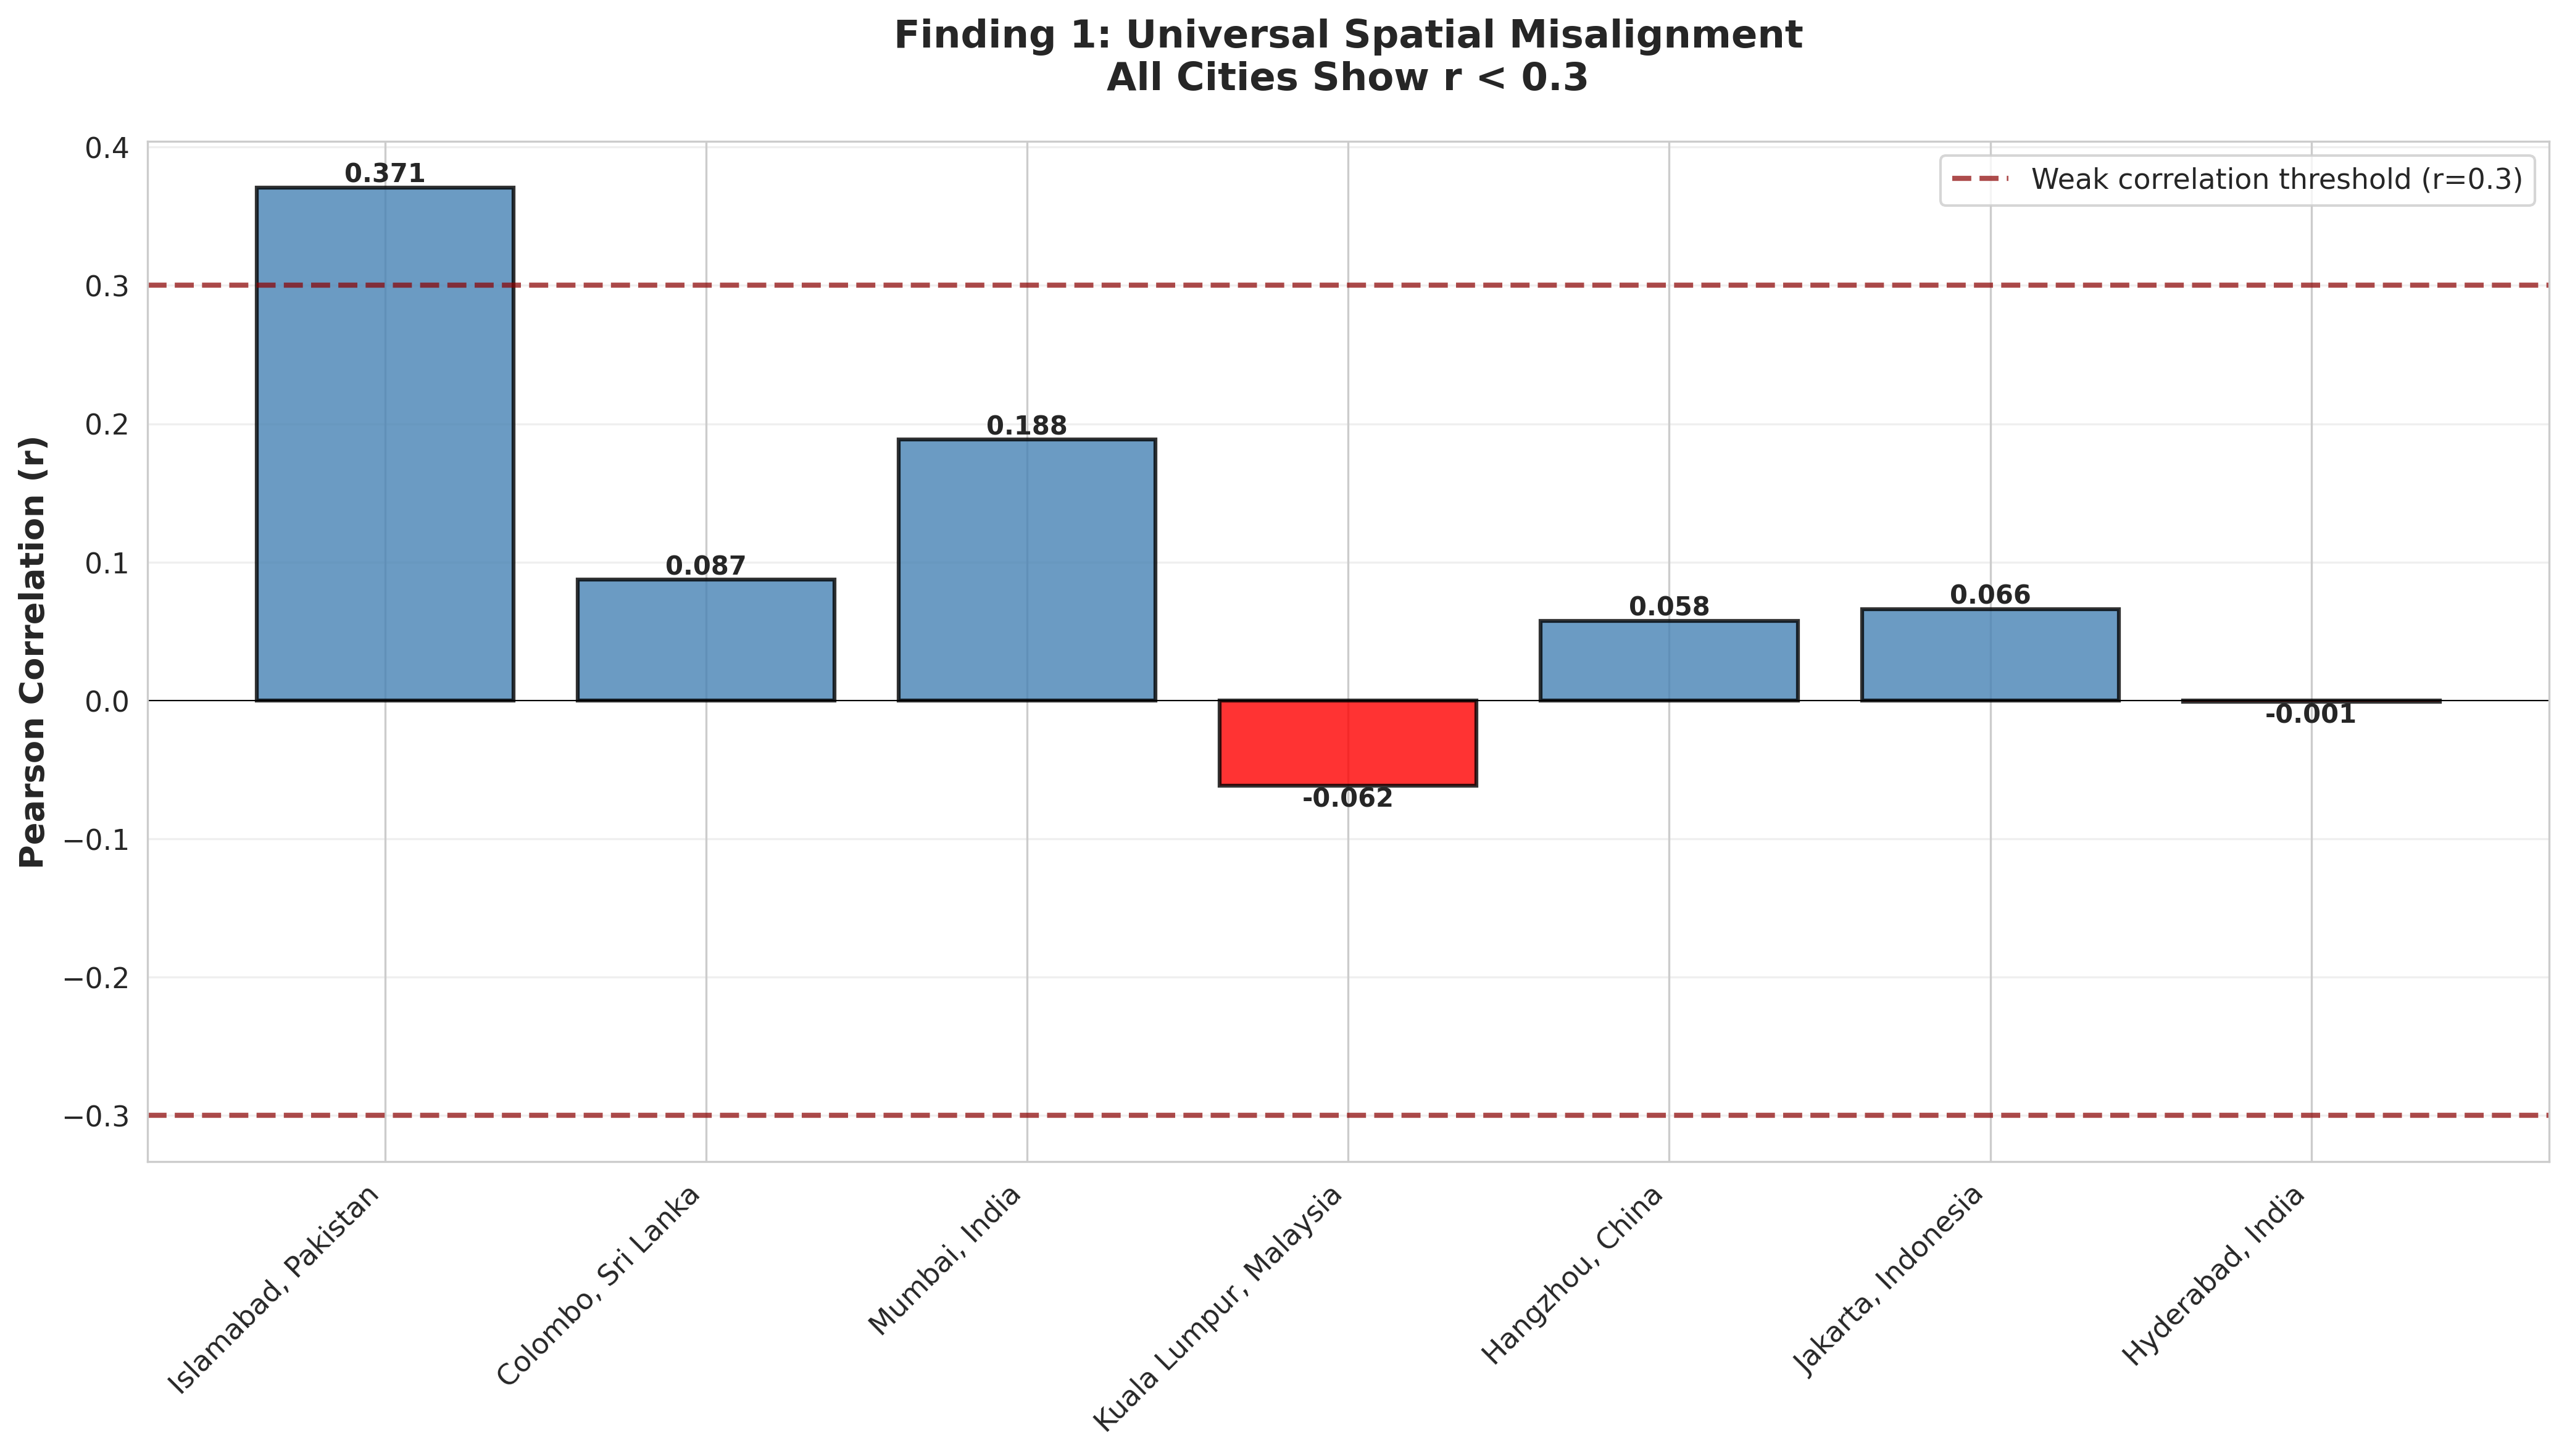
**Figure 1**: All cities show correlations below the r=0.3 "weak relationship" threshold, indicating universal spatial misalignment. Red dashed lines mark ±0.3 thresholds.

#### 4.2.3 Visual Evidence: Scatter Plot Analysis

Scatter plots reveal spatial relationships (or lack thereof) between vegetation and rainfall trends:

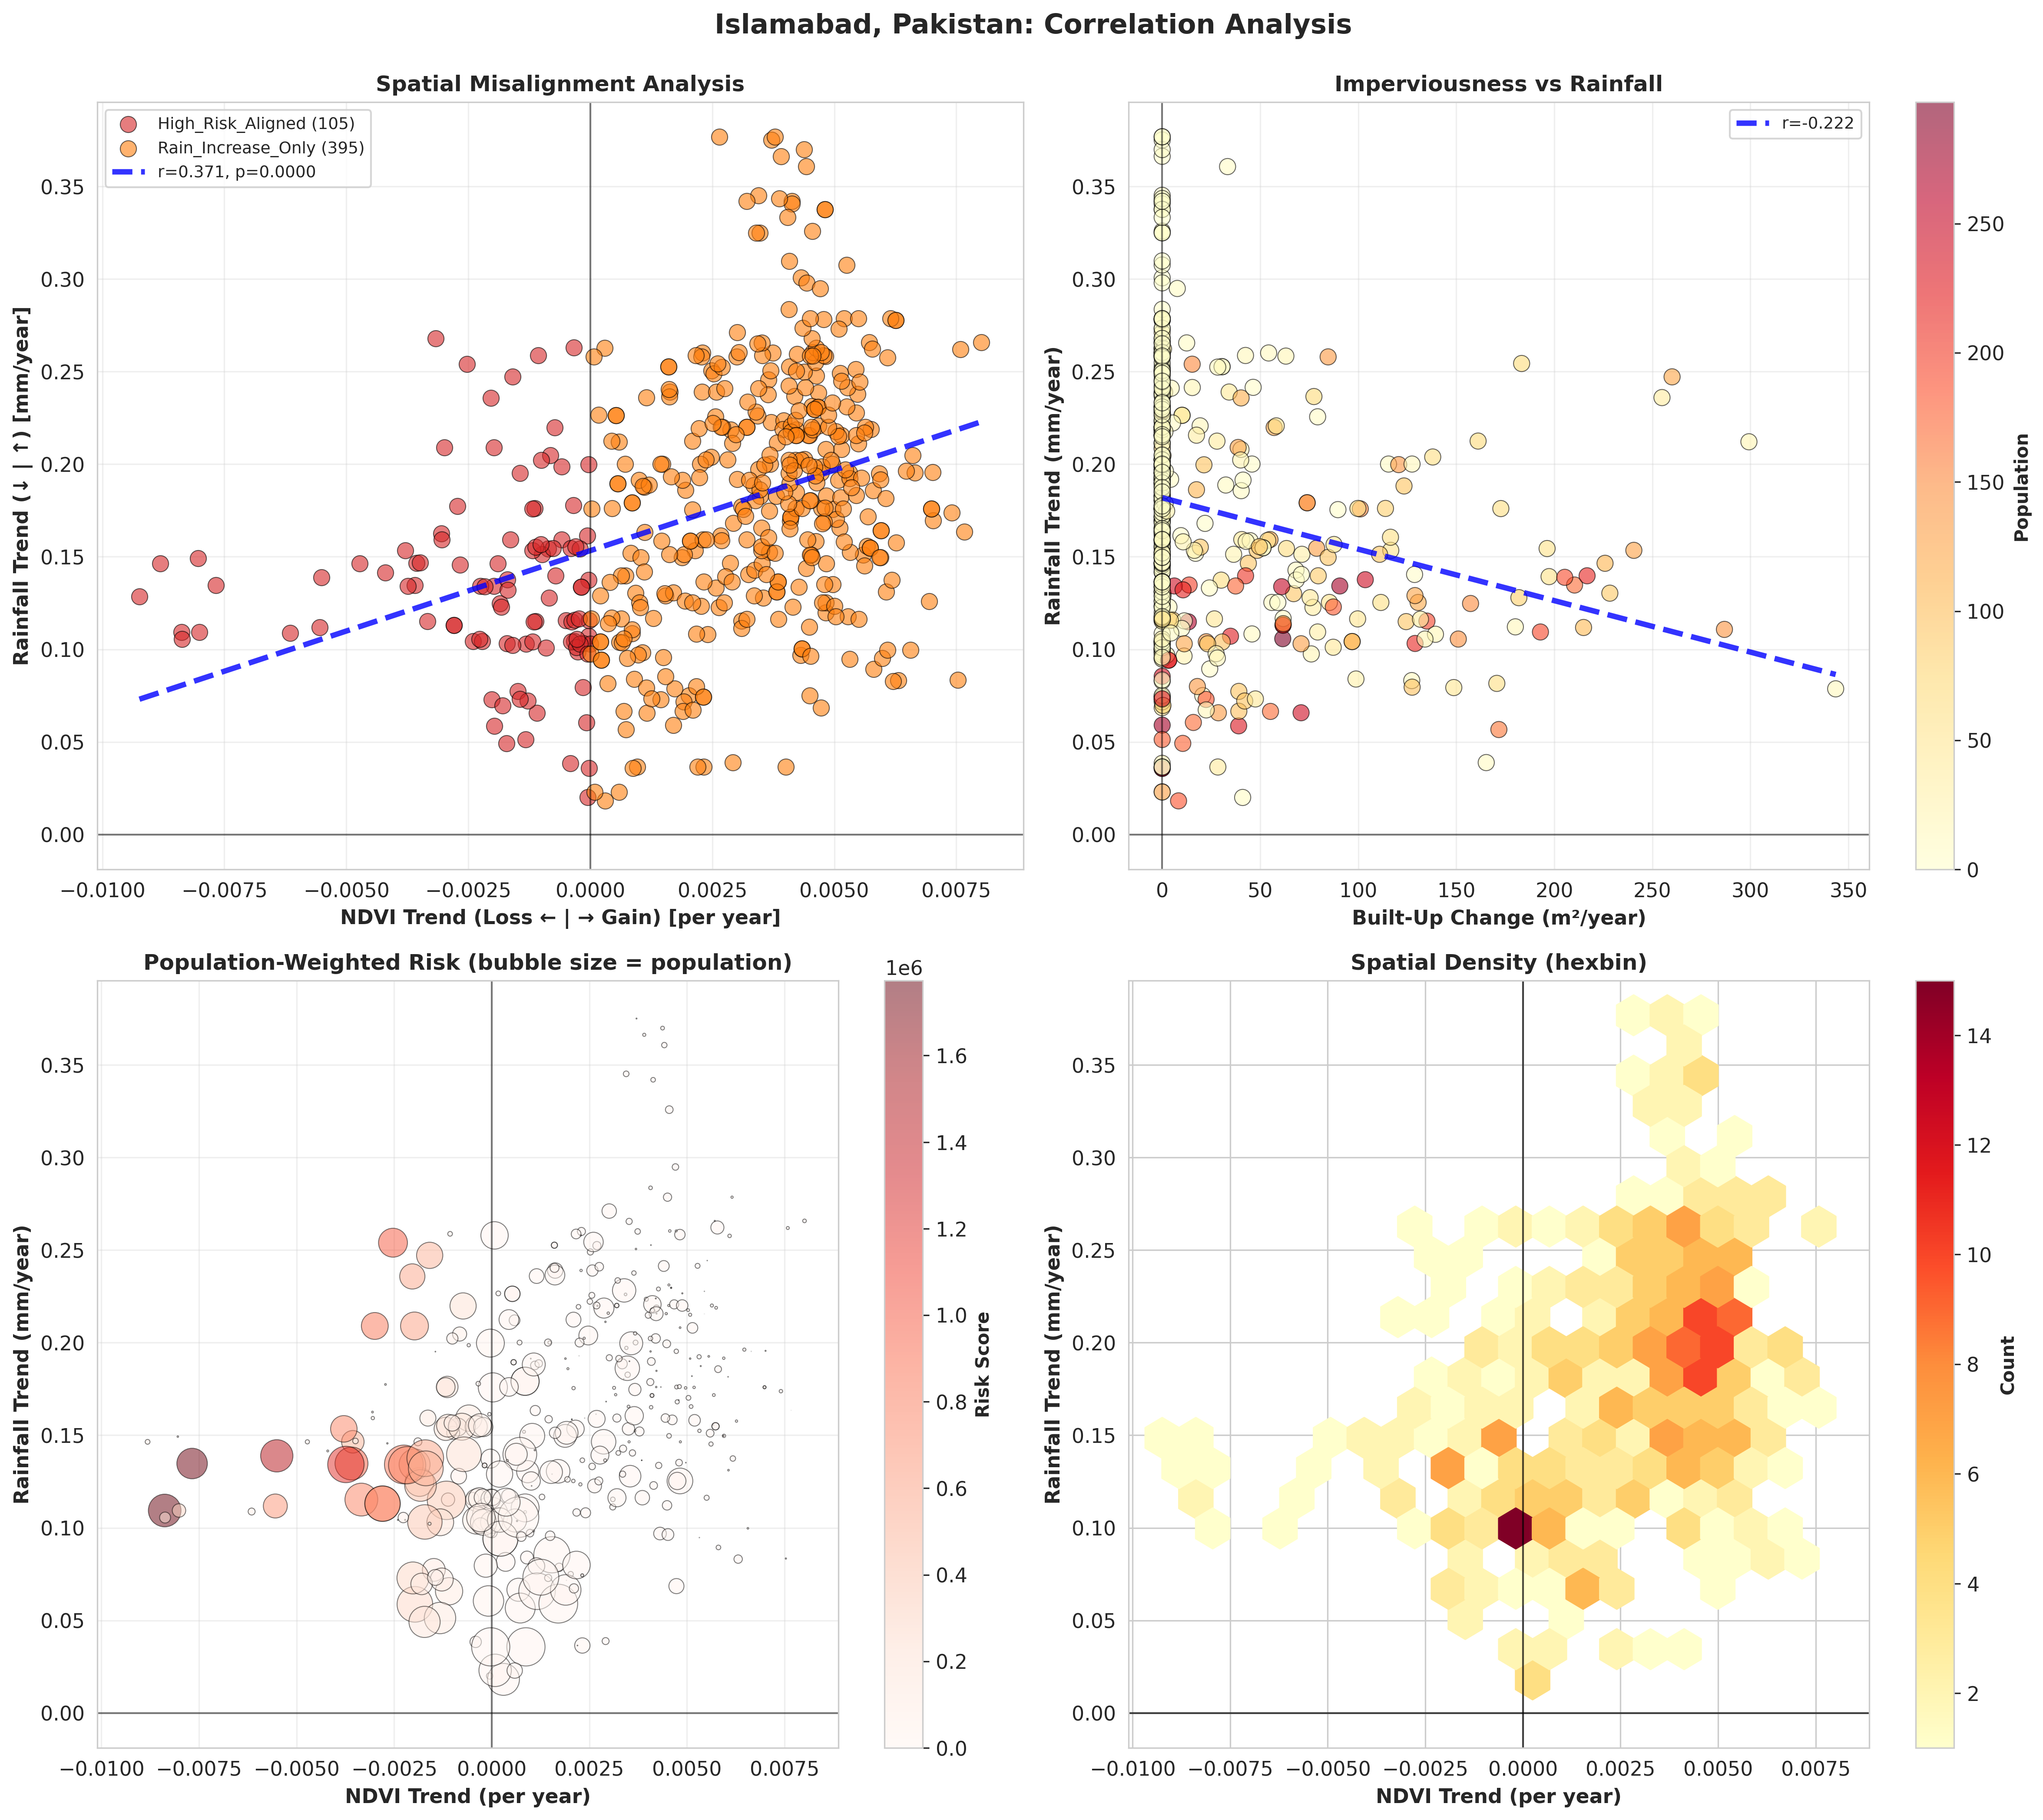
**Figure 2**: Islamabad scatter analysis (r=0.371, highest in sample). Despite being the strongest correlation, points scatter across all quadrants with minimal clustering in the high-risk zone (top-left). Only 21% of points show both rainfall increase AND vegetation loss.

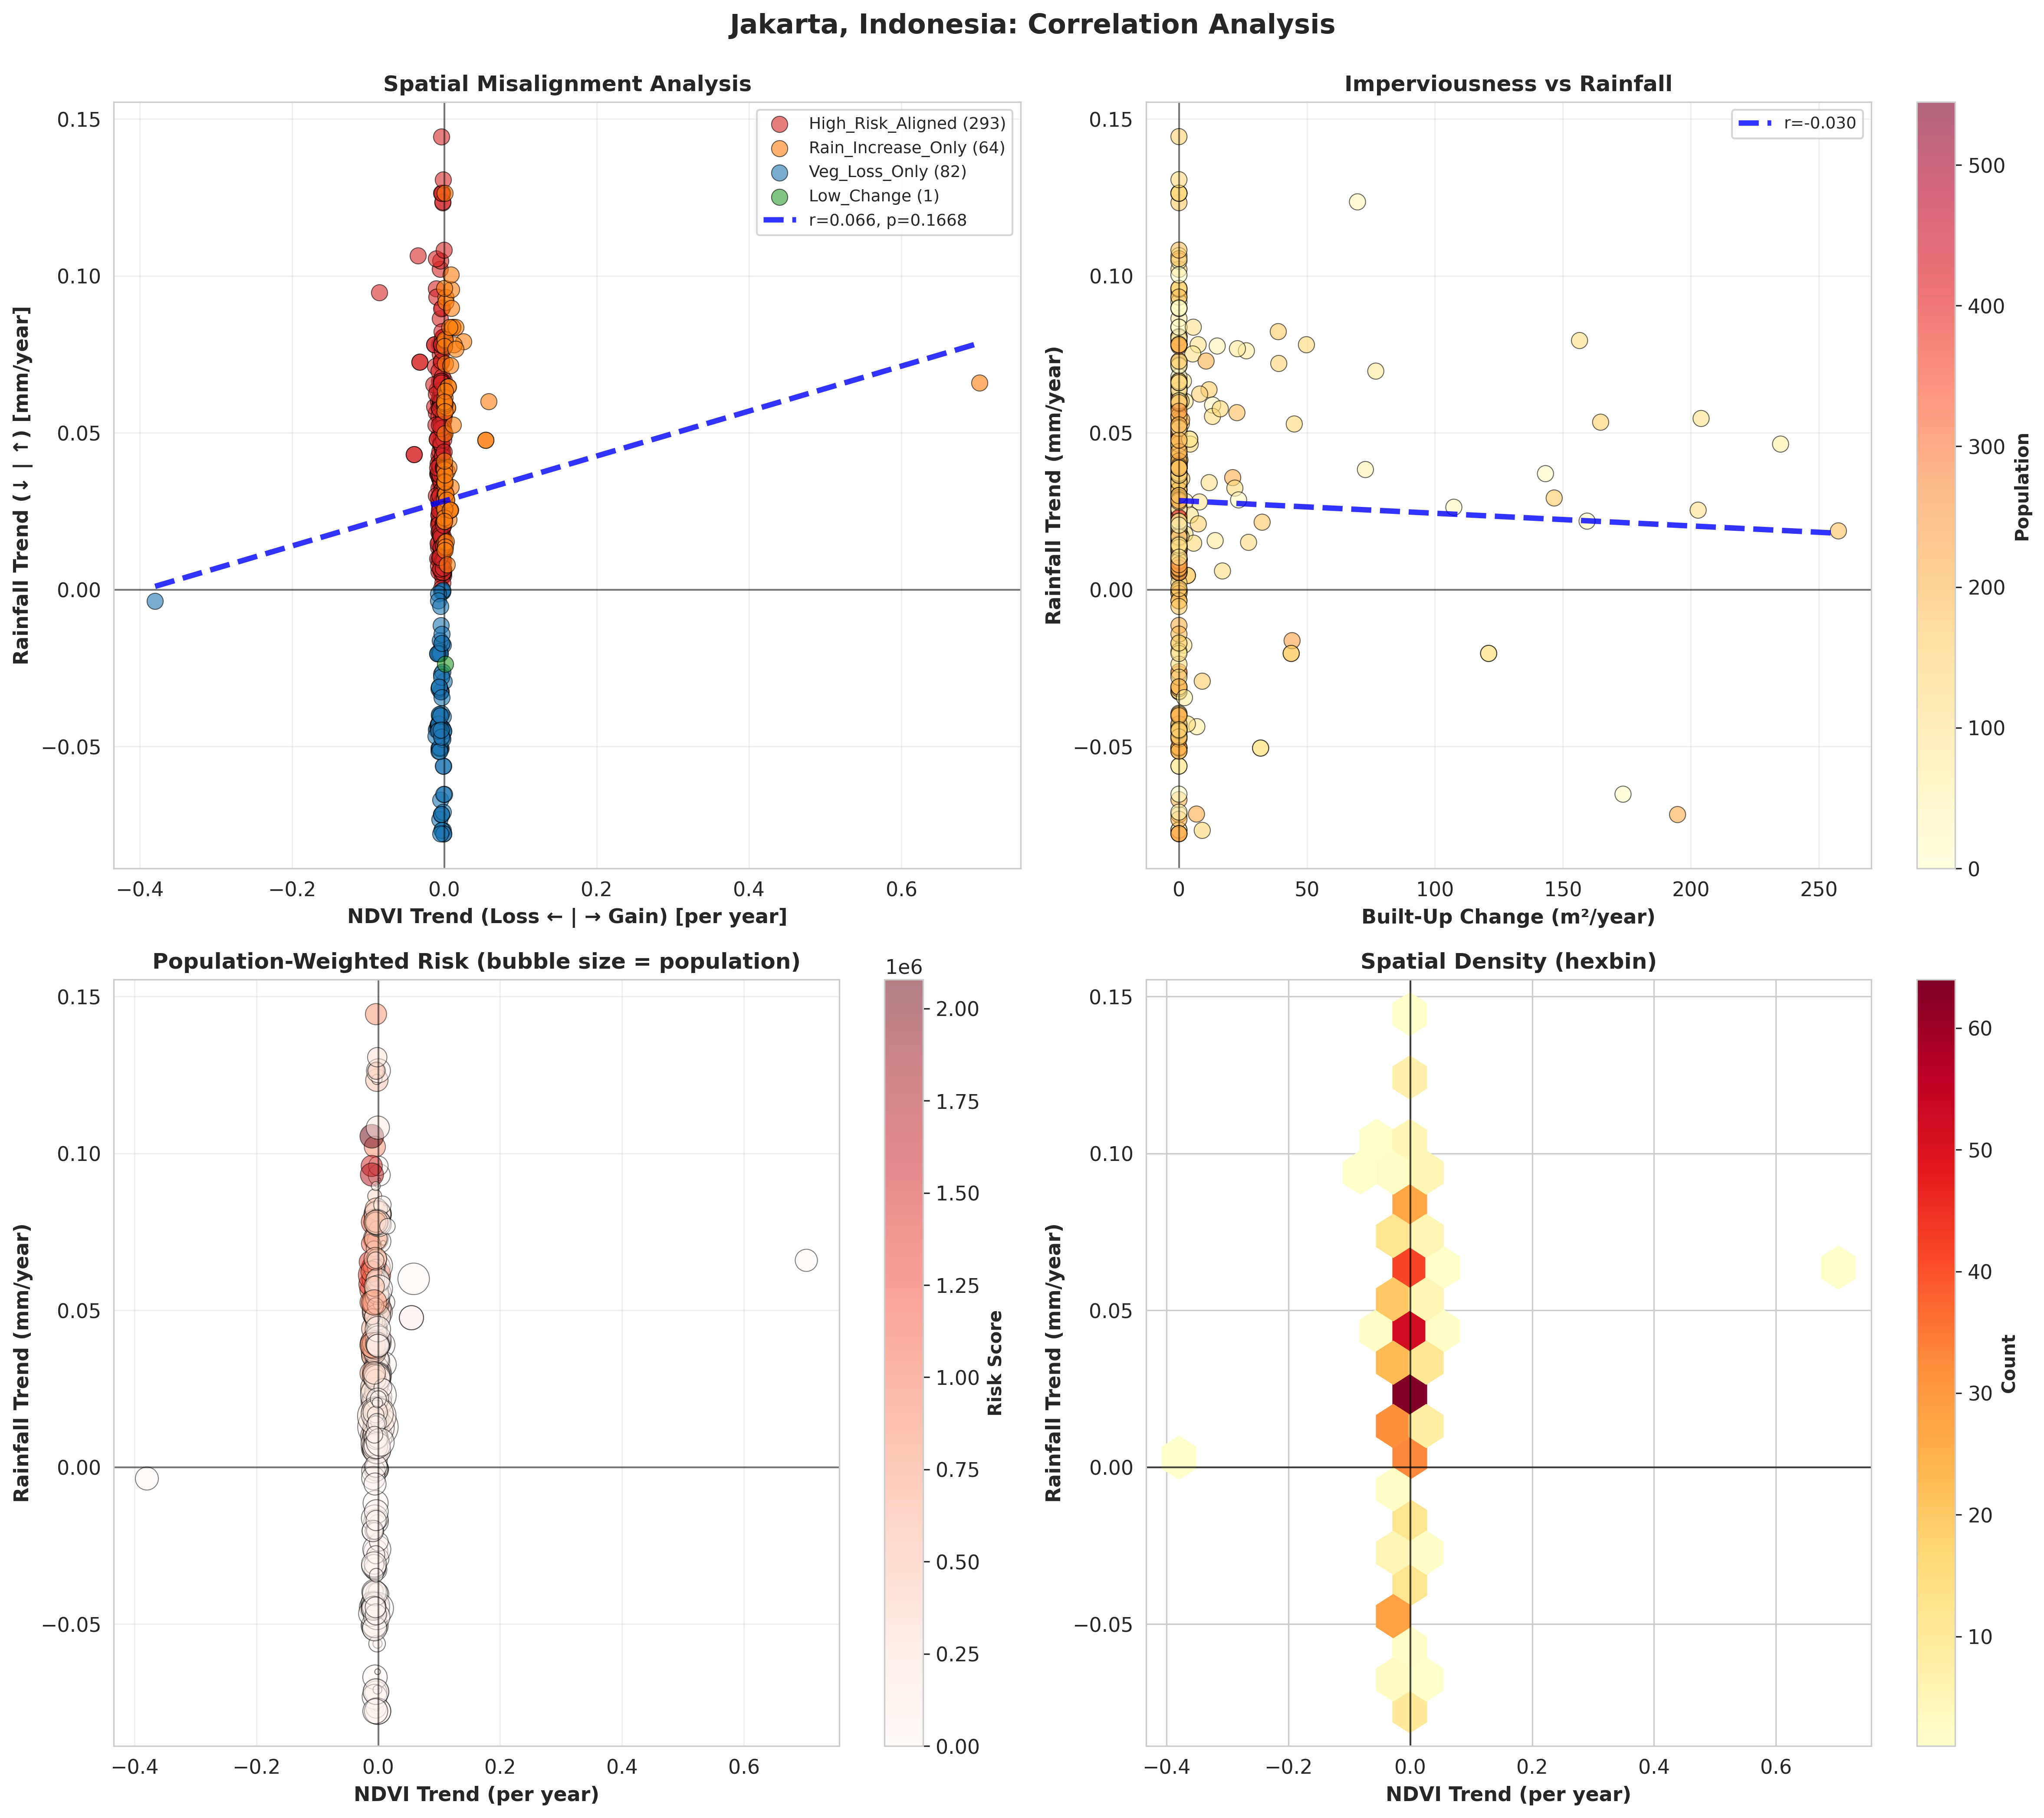
**Figure 3**: Jakarta scatter analysis (r=0.066, near-zero). Complete random scatter demonstrates no spatial relationship between processes. 66.6% of area shows aligned risk—not because planning responds, but because both processes are widespread.

**Key observations across all scatter plots:**
- Random point clouds rather than diagonal clustering
- If alignment existed, points would concentrate in top-left quadrant (High-Risk Aligned)
- Instead, points distribute across all four quadrants roughly equally
- Even cities with 60%+ high-risk coverage (Jakarta, Hangzhou) show no correlation

This visual evidence confirms statistical finding: **vegetation loss and rainfall intensification occur in different parts of cities**.


GENERATING VISUALIZATIONS - TEMPORAL TRENDS
Example: Temporal trends plot for Islamabad


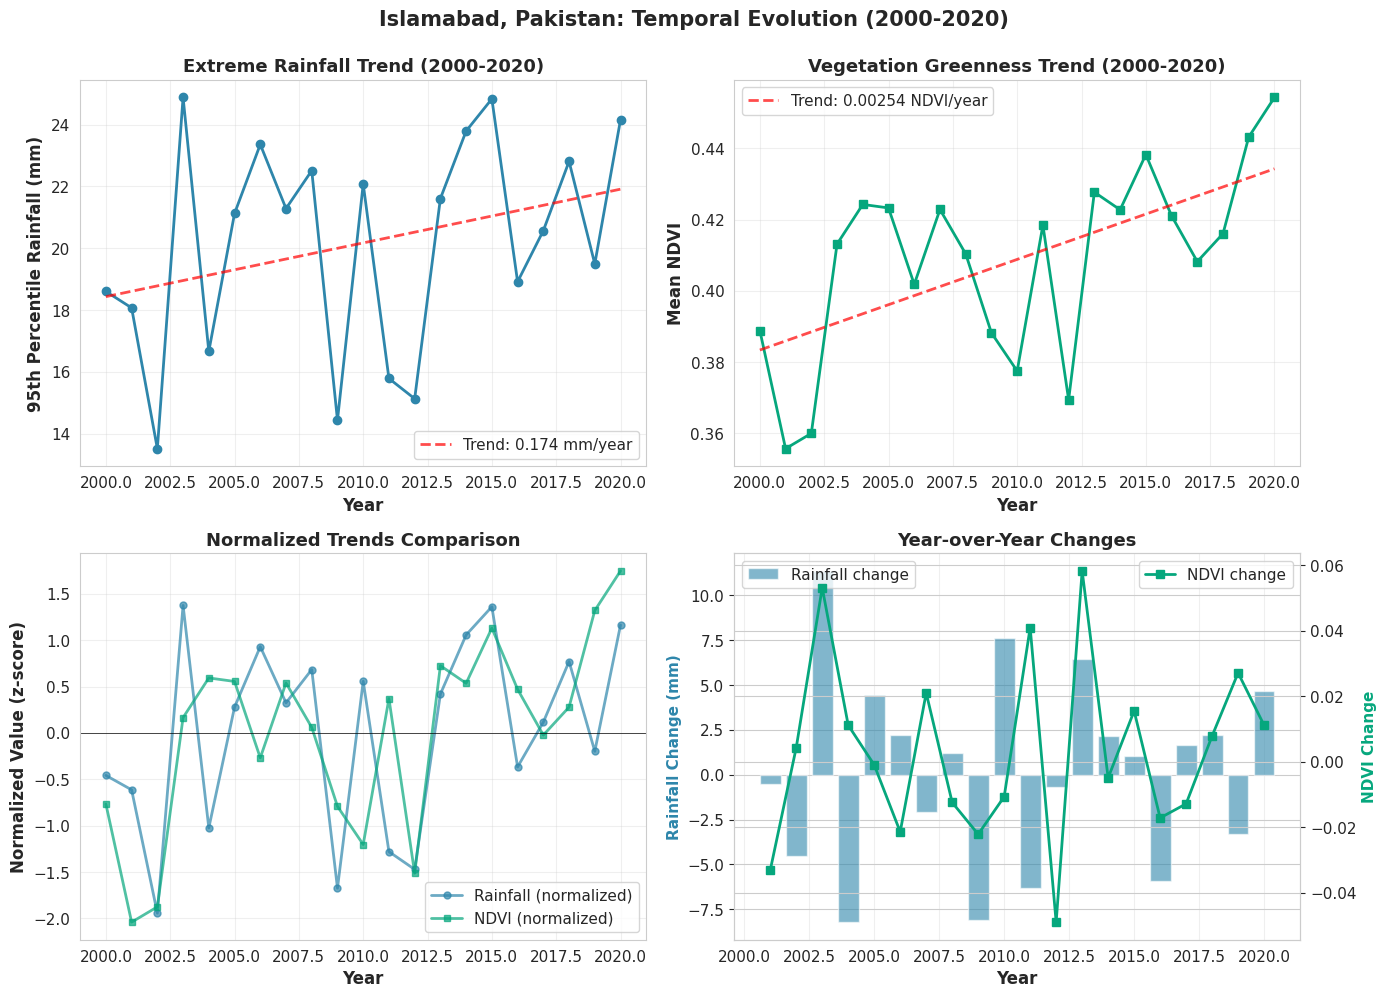

Islamabad: Temporal trends plot saved
Colombo: Temporal trends plot saved
Mumbai: Temporal trends plot saved
KualaLumpur: Temporal trends plot saved
Hangzhou: Temporal trends plot saved
Jakarta: Temporal trends plot saved
Hyderabad: Temporal trends plot saved


In [7]:

# ==========================================
#  5: VISUALIZATION - TEMPORAL TRENDS
# ==========================================

print(f"\n{'='*70}")
print("GENERATING VISUALIZATIONS - TEMPORAL TRENDS")
print(f"{'='*70}")

# Create temporal trend plots for each city
for city_key, results in all_results.items():

    # Skip if temporal data failed to extract
    if not results.get('has_temporal', False):
        print(f"⚠️  {city_key}: Skipping temporal plots (data extraction failed)")
        continue

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    years = results['years']
    rain_annual = results['rain_annual']
    ndvi_annual = results['ndvi_annual']

    # Plot 1: Rainfall over time
    ax1 = axes[0, 0]
    ax1.plot(years, rain_annual, marker='o', linewidth=2, markersize=6, color='#2E86AB')
    z = np.polyfit(years, rain_annual, 1)
    p = np.poly1d(z)
    ax1.plot(years, p(years), "--", linewidth=2, color='red', alpha=0.7,
             label=f'Trend: {z[0]:.3f} mm/year')
    ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax1.set_ylabel('95th Percentile Rainfall (mm)', fontsize=12, fontweight='bold')
    ax1.set_title('Extreme Rainfall Trend (2000-2020)', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='best')

    # Plot 2: NDVI over time
    ax2 = axes[0, 1]
    ax2.plot(years, ndvi_annual, marker='s', linewidth=2, markersize=6, color='#06A77D')
    z_ndvi = np.polyfit(years, ndvi_annual, 1)
    p_ndvi = np.poly1d(z_ndvi)
    ax2.plot(years, p_ndvi(years), "--", linewidth=2, color='red', alpha=0.7,
             label=f'Trend: {z_ndvi[0]:.5f} NDVI/year')
    ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Mean NDVI', fontsize=12, fontweight='bold')
    ax2.set_title('Vegetation Greenness Trend (2000-2020)', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='best')

    # Plot 3: Combined normalized trends
    ax3 = axes[1, 0]
    rain_norm = (np.array(rain_annual) - np.mean(rain_annual)) / np.std(rain_annual)
    ndvi_norm = (np.array(ndvi_annual) - np.mean(ndvi_annual)) / np.std(ndvi_annual)

    ax3.plot(years, rain_norm, marker='o', linewidth=2, markersize=5,
             color='#2E86AB', label='Rainfall (normalized)', alpha=0.7)
    ax3.plot(years, ndvi_norm, marker='s', linewidth=2, markersize=5,
             color='#06A77D', label='NDVI (normalized)', alpha=0.7)
    ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax3.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Normalized Value (z-score)', fontsize=12, fontweight='bold')
    ax3.set_title('Normalized Trends Comparison', fontsize=13, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend(loc='best')

    # Plot 4: Year-over-year changes
    ax4 = axes[1, 1]
    rain_changes = np.diff(rain_annual)
    ndvi_changes = np.diff(ndvi_annual)
    years_diff = years[1:]

    ax4.bar(years_diff, rain_changes, alpha=0.6, color='#2E86AB', label='Rainfall change')
    ax4_twin = ax4.twinx()
    ax4_twin.plot(years_diff, ndvi_changes, marker='s', linewidth=2,
                  color='#06A77D', label='NDVI change')

    ax4.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Rainfall Change (mm)', fontsize=11, fontweight='bold', color='#2E86AB')
    ax4_twin.set_ylabel('NDVI Change', fontsize=11, fontweight='bold', color='#06A77D')
    ax4.set_title('Year-over-Year Changes', fontsize=13, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='x')
    ax4.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')

    plt.suptitle(f'{results["city_name"]}: Temporal Evolution (2000-2020)',
                 fontsize=15, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/{city_key}_temporal_trends.png', dpi=300, bbox_inches='tight')
    if(city_key=="Islamabad"):
      print("Example: Temporal trends plot for Islamabad")
      plt.show()
    plt.close()

    print(f"{city_key}: Temporal trends plot saved")
# TEMPORAL TRENDS (4 panels per city) Plot Interpretation guide(File: {CityName}_temporal_trends.png):

# PANEL A: Rainfall Over Time (Top Left)

# X-axis: Years (2000-2020)
# Y-axis: 95th percentile rainfall (mm)
# Blue line: Annual extreme rainfall values
# Red dashed line: Linear trend
# What to look for:
# -Upward slope = Extreme rainfall increasing over time
# -Downward slope = Extreme rainfall decreasing
# -Steep slope = Rapid change
# -Flat slope = Stable conditions
# -Example Interpretation:
# "Islamabad shows a clear upward trend (+0.15 mm/year), indicating intensifying extreme rainfall events over the 21-year period."

# PANEL B: NDVI Over Time (Top Right)

# X-axis: Years (2000-2020)
# Y-axis: Mean NDVI (0-1 scale)
# Green line: Annual vegetation greenness
# Red dashed line: Linear trend
# What to look for:
# -Downward slope = City getting browner (vegetation loss)
# -Upward slope = City getting greener (afforestation)
# -Fluctuations = Seasonal/climate variability
# -Example Interpretation:
# "Mumbai exhibits declining NDVI (-0.0003/year), consistent with rapid urbanization and green space conversion."

# PANEL C: Normalized Trends (Bottom Left)

# Purpose: Compare rainfall and NDVI trends on same scale
# Both lines normalized to z-scores (mean=0, SD=1)
# What to look for:
# -Diverging lines = Rainfall and vegetation moving in opposite directions (misalignment)
# -Parallel lines = Both changing together (alignment)
# -Crossing lines = Relationship changes over time
# -Example Interpretation:
# "The divergence between rainfall (increasing) and NDVI (decreasing) visually confirms spatial misalignment."

# PANEL D: Year-over-Year Changes (Bottom Right)

# Blue bars: Annual rainfall change (mm)
# Green line: Annual NDVI change
# What to look for:
# - Large bar spikes = Extreme events (droughts, floods)
# - Consistent direction = Sustained trend
# - High variability = Unstable climate

#### 4.2.4 Quadrant Distribution

**% of area in High-Risk Aligned quadrant:**

| City | % High-Risk | % Rain Only | % Veg Only | % Low Change |
|------|-------------|-------------|------------|--------------|
| Islamabad | 21.0% | 79.0% | 0.0% | 0.0% |
| Colombo | 22.8% | 66.5% | 10.7% | 0.0% |
| Mumbai | 25.3% | 52.9% | 21.8% | 0.0% |
| KL | 37.0% | 50.7% | 12.3% | 0.0% |
| Hyderabad | 52.4% | 44.6% | 2.6% | 0.4% |
| Hangzhou | 59.7% | 35.9% | 4.1% | 0.3% |
| Jakarta | 66.6% | 30.7% | 2.5% | 0.2% |

**Pattern**: As climate zone shifts from continental→monsoon→equatorial, % high-risk increases. BUT correlation remains weak regardless. This means:
- Jakarta: 66.6% shows aligned risk NOT because planning responds, but because both rainfall intensification and vegetation loss are widespread
- Islamabad: 21% shows aligned risk because both processes are localized—but to different locations

**Conclusion for H1:****H1 strongly supported**

Urban development patterns do NOT align spatially with emerging climate risk patterns. This universality across diverse contexts suggests **structural**, not political, causes.

---

### 4.3 Finding 2: Divergent Population Exposure Patterns (H2 Context-Dependent)

While H1 shows universal misalignment, H2 reveals stark variation in *who bears the consequences*.

#### 4.3.1 Exposure Ratios

**Key metric**: Exposure Ratio = (% Population Exposed) / (% Area at Risk)

| City | % Area Risk | % Pop Exposed | Exposure Ratio | Classification |
|------|-------------|---------------|----------------|----------------|
| **Islamabad** | 21.0% | **52.3%** | **2.49×** | **Type A** |
| Hyderabad | 52.4% | 65.5% | 1.25× | Type B |
| KL | 37.0% | 38.4% | 1.04× | Type B |
| Jakarta | 66.6% | 68.6% | 1.03× | Type B |
| Hangzhou | 59.7% | 55.5% | 0.93× | Type B/C |
| Mumbai | 25.3% | 19.5% | **0.77×** | **Type C** |
| Colombo | 22.8% | 16.4% | **0.72×** | **Type C** |

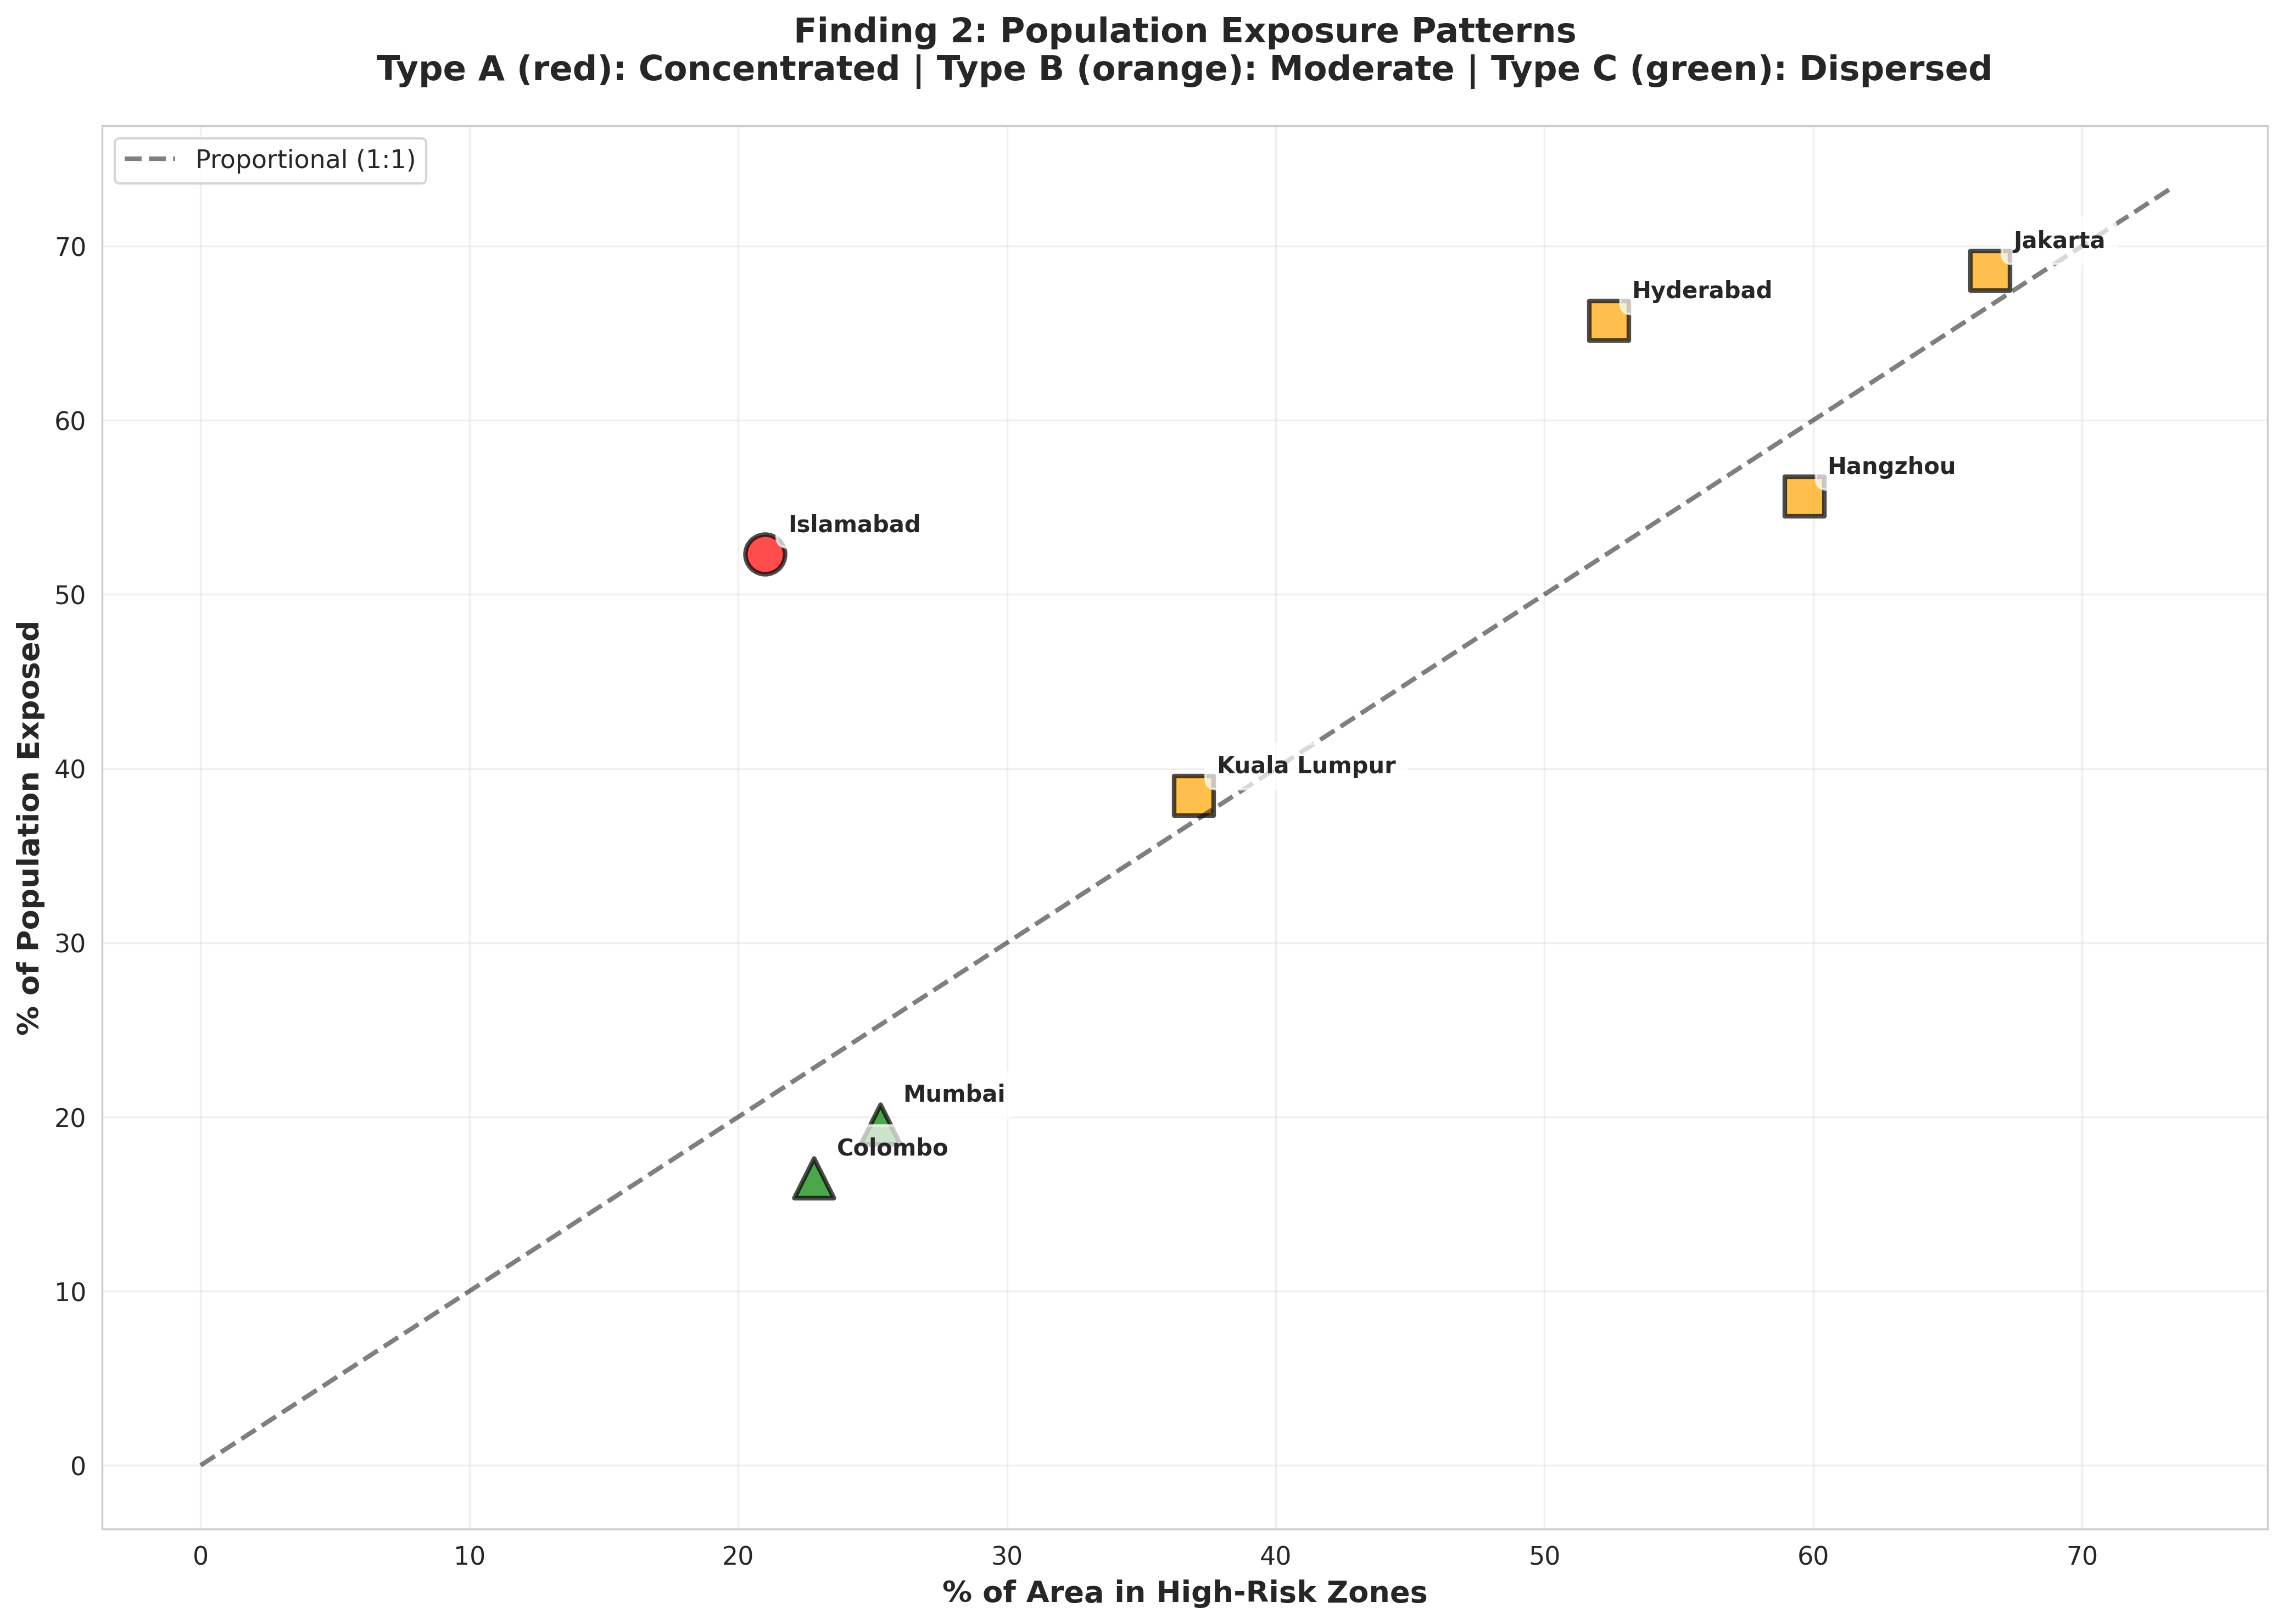
**Figure 4**: Exposure ratio scatter plot. Points above diagonal (Islamabad) indicate concentrated exposure. Points on/below diagonal (Colombo, Mumbai) indicate proportional or protective distributions. The 2.49× concentration in Islamabad represents extreme environmental injustice.

#### 4.3.2 Type A: Concentrated Exposure (Environmental Injustice)

**Islamabad: 2.49× exposure ratio**

**What this means:**
- Despite high-risk zones comprising only 21% of city area
- These zones house **52.3% of the population**
- **2.49 times MORE people** than proportional distribution would predict

**Mechanisms (likely):**
- Informal settlements proliferate in flood-prone valleys (cheap land)
- Weak zoning enforcement allows construction in hazard zones
- Rural-urban migration overwhelming formal housing supply
- Economic sorting: wealthy avoid valleys, poor have no alternatives

**Evidence from our data:**
- Population density in high-risk zones: Higher than city average
- Risk per capita: Elevated despite moderate absolute risk
- Clear spatial concentration pattern visible in maps

**Policy implication**: This is **systematic environmental injustice**, not random. Vulnerable populations systematically sorted into dangerous areas.

#### 4.3.3 Type B: Moderate/Proportional Exposure

**Hyderabad (1.25×), Kuala Lumpur (1.04×), Jakarta (1.03×)**

**Interpretation:**
- Population distribution roughly matches risk distribution
- Could reflect: Uniform urban sprawl, geographic constraints limiting options, or moderate planning capacity

**Jakarta special case:**
- 66.6% of area at risk
- 68.6% of population exposed
- Nearly perfect proportional distribution (1.03×)
- BUT: This doesn't mean effective planning—it means **ubiquitous risk** (nowhere safe to avoid)

#### 4.3.4 Type C: Dispersed/Protective Exposure

**Colombo (0.72×), Mumbai (0.77×)**

**What this means:**
- High-risk zones comprise 22.8% (Colombo) / 25.3% (Mumbai) of area
- But only 16.4% / 19.5% of population lives there
- People AVOID high-risk zones or distribute proportionally

**Possible mechanisms:**

**For Colombo:**
- Post-2004 tsunami: Strong coastal zoning restrictions
- Island geography: Limited land forces efficient use
- Lower population pressure allows better distribution

**For Mumbai:**
- Despite being largest city (150k pop in ROI), shows protective pattern
- Possible: Historical development patterns, effective informal coping strategies, or geographic luck

**Critical observation**: These Type C cities STILL show misalignment (r < 0.2). This means:
- Planning doesn't respond to climate (H1)
- BUT people/planning avoid worst zones (H2)
- Environmental justice outcome better despite planning failure

#### 4.3.5 Cross-City Risk Metrics

**Cumulative risk scores:**
- Mumbai: 484,109,984 (highest—driven by population × density)
- Hangzhou: 789,175,399 (highest per capita)
- Islamabad: 40,598,563 (moderate absolute, high concentration)

**Risk per capita:**
- Hangzhou: 4,778 (wealthiest city, highest individual risk)
- Mumbai: 3,236 (dense but protective distribution)
- Islamabad: 2,019 (concentrated but smaller population)

**Interpretation**: Absolute risk varies by city size and density. Exposure ratio reveals whether risk is equitably distributed (Type B/C) or concentrated on vulnerable populations (Type A).

**Conclusion for H2: H2 is context-dependent**

Population exposure varies dramatically despite universal misalignment:
- Type A (Islamabad): Extreme concentration → environmental injustice
- Type B (Hyderabad, KL, Jakarta): Proportional → moderate exposure
- Type C (Colombo, Mumbai): Protective → better outcomes despite planning failure

**Governance quality determines who pays the price for planning failures.**

---

### 4.4 Finding 3: The Kuala Lumpur Anomaly

**Unique pattern**: KL shows **negative correlation** (r = -0.062)

**Meaning**: Vegetation INCREASES where rainfall intensifies

**Three possible explanations:**

**1. Adaptive Greening Hypothesis (Optimistic):**
- KL implementing climate-responsive land use
- Rain gardens, bioswales, urban forests in flood-prone areas


**2. Agricultural Response Hypothesis (Neutral):**
- Rural/peri-urban areas within 20km buffer getting wetter
- Farmers responding with more cultivation

**3. Data Artifact Hypothesis (Skeptical):**
- Equatorial cloud cover interfering with MODIS NDVI
- Evidence: Persistent clouds year-round despite quality filtering

**Statistical caveat**: r = -0.062 is weak and not statistically significant (p = 0.174). Could be random noise.

**Significance**: If explanation #1 is correct, KL is the **only city in our sample implementing climate-responsive planning**. This deserves follow-up qualitative investigation (site visits, planner interviews, policy analysis).

**For now**: Treat as hypothesis-generating, not conclusive. But intriguing enough to warrant further research.

---

### 4.5 Finding 4: Climate Zone Effects on Risk Geography

**Pattern**: Risk extent varies systematically by climate zone

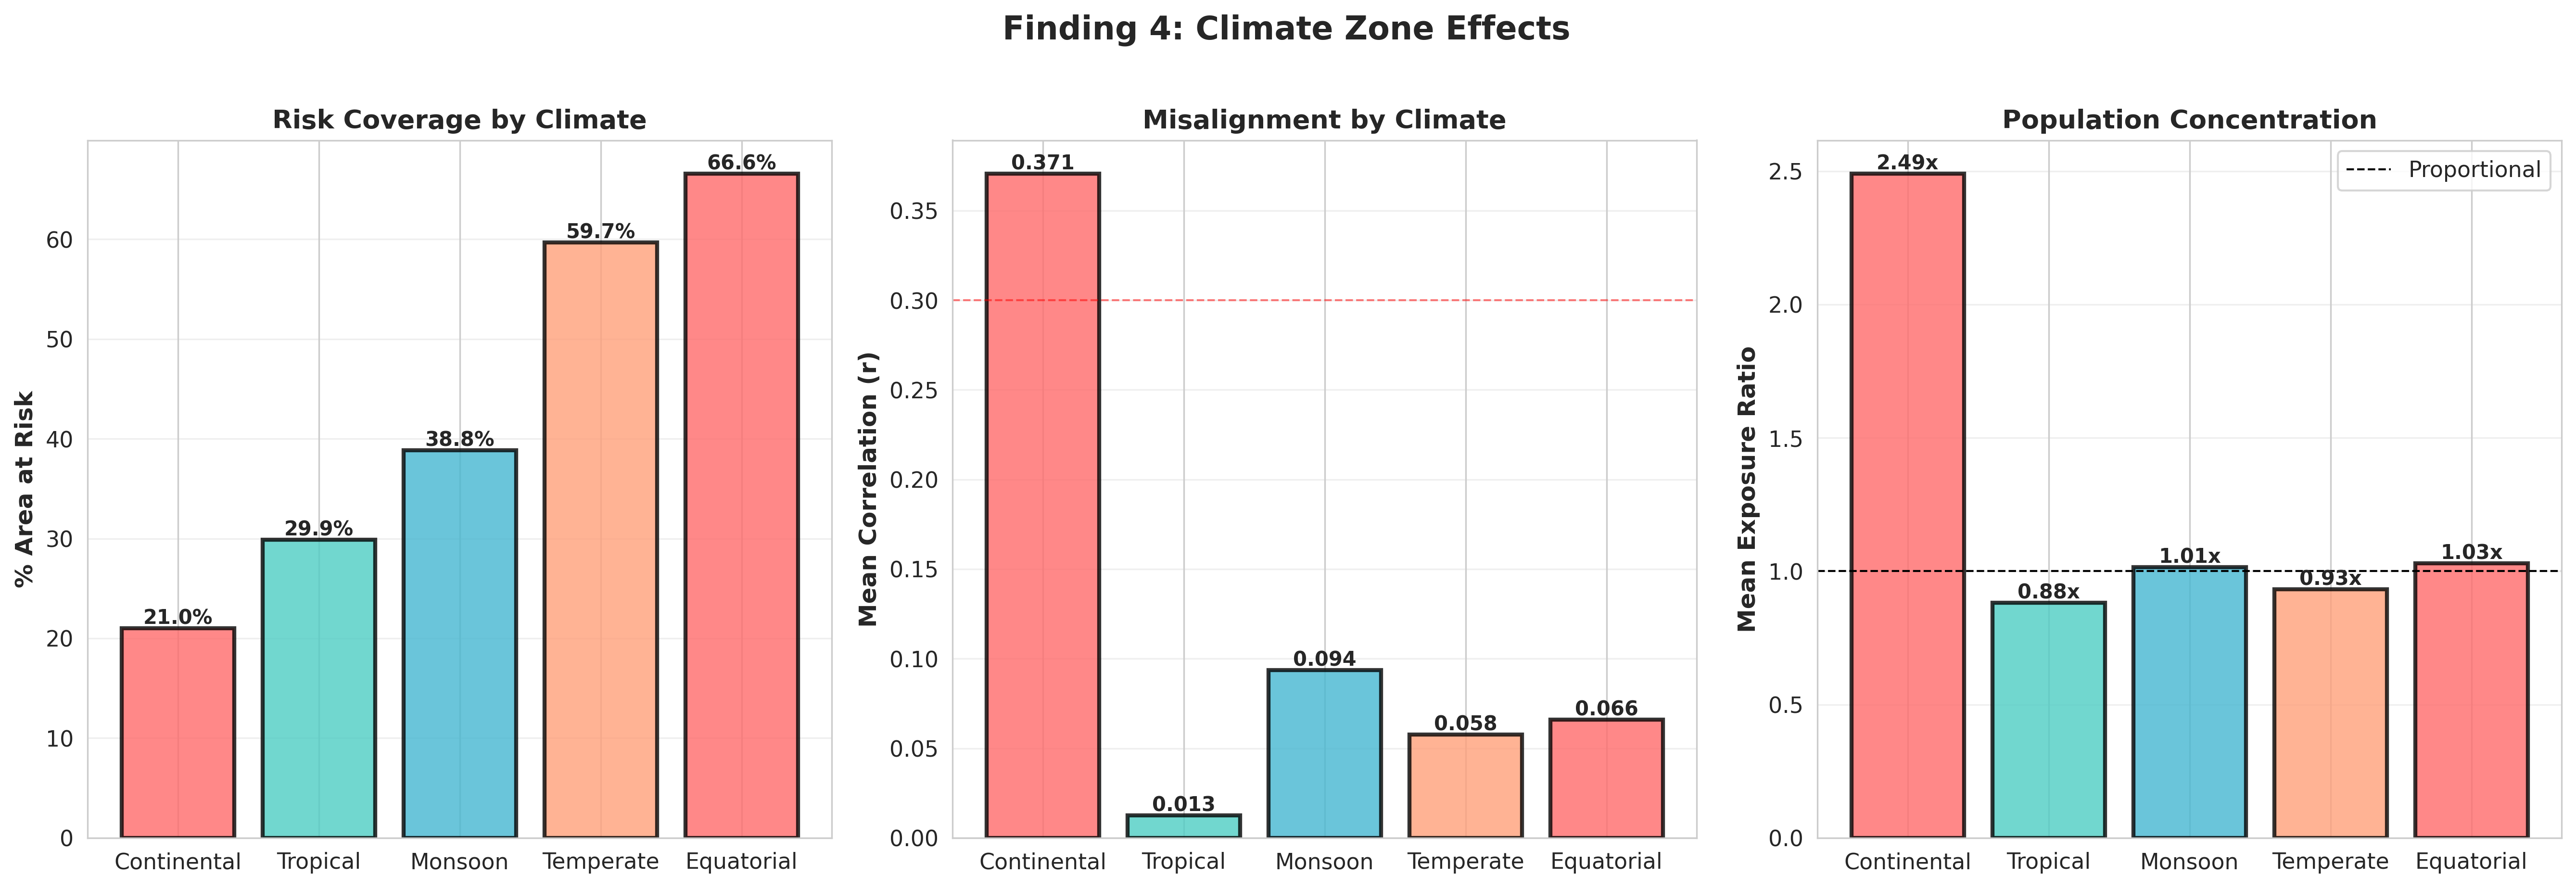
**Figure 5**: Climate zone comparison showing risk coverage (left), mean correlation (center), and exposure ratios (right). Equatorial cities show highest risk coverage (66%) but similar misalignment to continental cities (21% coverage).

**Risk extent by climate:**
- **Equatorial (Jakarta)**: 66.6% of area at risk
- **Temperate (Hangzhou)**: 59.7%
- **Monsoon (Mumbai, Hyderabad)**: 25.3-52.4% (mean 38.9%)
- **Tropical (Colombo, KL)**: 22.8-37.0% (mean 29.9%)
- **Continental (Islamabad)**: 21.0%

**Possible Explanation**: Different rainfall mechanisms produce different spatial patterns:
- **Equatorial**: Convective rainfall intensifies uniformly → widespread risk
- **Continental**: Rainfall concentrates in valleys → localized risk
- **Monsoon**: Intermediate, depends on topography

**Critical finding**: Despite different risk *extent*, all zones show misalignment.
- Jakarta (66.6% at risk): r = 0.066 (random)
- Islamabad (21% at risk): r = 0.371 (weak)

**Implication**: Climate zone affects HOW MUCH of city is at risk, not WHETHER planning responds.

**Policy consequence:**
- **Ubiquitous-risk cities (Jakarta, Hangzhou)**: Cannot "zone away" from problem → need city-wide adaptation
- **Localized-risk cities (Islamabad, Colombo)**: Theoretically could restrict development in high-risk zones → but Type A finding shows this isn't happening in Islamabad

---


GENERATING VISUALIZATIONS - SCATTER PLOTS
Islamabad: Scatter analysis saved
Colombo: Scatter analysis saved
Mumbai: Scatter analysis saved
KualaLumpur: Scatter analysis saved
Hangzhou: Scatter analysis saved
Jakarta: Scatter analysis saved

Example: Scatter analysis for Hyderabad


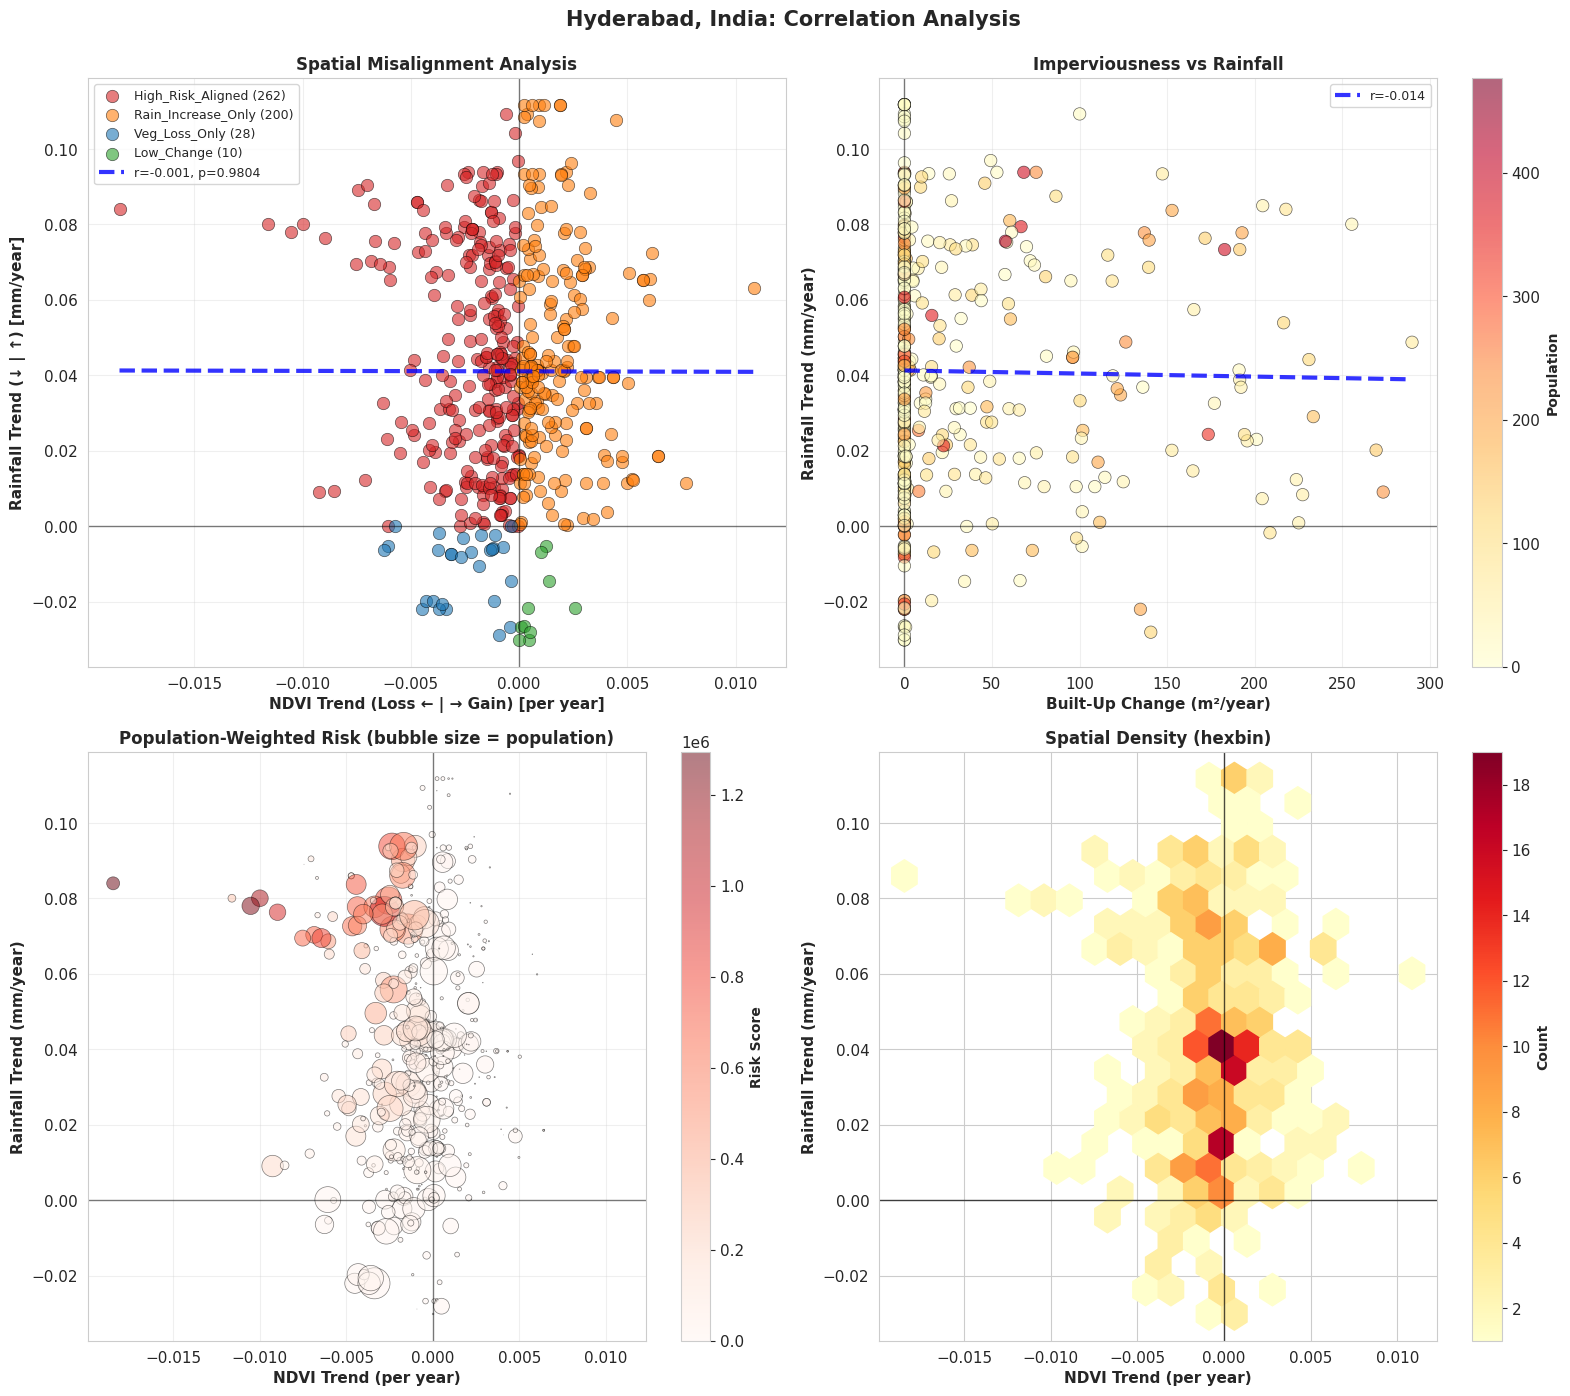

Hyderabad: Scatter analysis saved


In [13]:

# ==========================================
# 6: VISUALIZATION - SCATTER PLOTS
# ==========================================

print(f"\n{'='*70}")
print("GENERATING VISUALIZATIONS - SCATTER PLOTS")
print(f"{'='*70}")

colors = {
    'High_Risk_Aligned': '#d62728',
    'Rain_Increase_Only': '#ff7f0e',
    'Veg_Loss_Only': '#1f77b4',
    'Low_Change': '#2ca02c'
}

for city_key, results in all_results.items():
    df = results['df']

    fig, axes = plt.subplots(2, 2, figsize=(16, 14))

    # Plot 1: Main scatter plot with quadrants
    ax1 = axes[0, 0]
    for quadrant, color in colors.items():
        subset = df[df['Quadrant'] == quadrant]
        if len(subset) > 0:
            ax1.scatter(subset['NDVI_Trend'], subset['Rain_Trend'],
                       c=color, label=f"{quadrant} ({len(subset)})",
                       alpha=0.6, s=80, edgecolors='black', linewidth=0.5)

    z = np.polyfit(df['NDVI_Trend'], df['Rain_Trend'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df['NDVI_Trend'].min(), df['NDVI_Trend'].max(), 100)
    ax1.plot(x_line, p(x_line), "b--", alpha=0.8, linewidth=3,
            label=f'r={results["corr_ndvi"]:.3f}, p={results["p_value"]:.4f}')

    ax1.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax1.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax1.set_xlabel('NDVI Trend (Loss ← | → Gain) [per year]', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Rainfall Trend (↓ | ↑) [mm/year]', fontsize=11, fontweight='bold')
    ax1.set_title('Spatial Misalignment Analysis', fontsize=12, fontweight='bold')
    ax1.legend(loc='best', fontsize=9)
    ax1.grid(True, alpha=0.3)

    # Plot 2: Built-up vs Rainfall
    ax2 = axes[0, 1]
    scatter = ax2.scatter(df['BuiltUp_Change'], df['Rain_Trend'],
                         c=df['Pop'], cmap='YlOrRd', alpha=0.6, s=80,
                         edgecolors='black', linewidth=0.5)

    z_built = np.polyfit(df['BuiltUp_Change'], df['Rain_Trend'], 1)
    p_built = np.poly1d(z_built)
    x_line_built = np.linspace(df['BuiltUp_Change'].min(), df['BuiltUp_Change'].max(), 100)
    ax2.plot(x_line_built, p_built(x_line_built), "b--", alpha=0.8, linewidth=3,
            label=f'r={results["corr_built"]:.3f}')

    ax2.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax2.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax2.set_xlabel('Built-Up Change (m²/year)', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Rainfall Trend (mm/year)', fontsize=11, fontweight='bold')
    ax2.set_title('Imperviousness vs Rainfall', fontsize=12, fontweight='bold')
    ax2.legend(loc='best', fontsize=9)
    ax2.grid(True, alpha=0.3)
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Population', fontsize=10, fontweight='bold')

    # Plot 3: Population-weighted scatter
    ax3 = axes[1, 0]
    sizes = df['Pop'] / df['Pop'].max() * 500
    scatter3 = ax3.scatter(df['NDVI_Trend'], df['Rain_Trend'],
                          s=sizes, c=df['Risk_Score'], cmap='Reds',
                          alpha=0.5, edgecolors='black', linewidth=0.5)
    ax3.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax3.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax3.set_xlabel('NDVI Trend (per year)', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Rainfall Trend (mm/year)', fontsize=11, fontweight='bold')
    ax3.set_title('Population-Weighted Risk (bubble size = population)', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    cbar3 = plt.colorbar(scatter3, ax=ax3)
    cbar3.set_label('Risk Score', fontsize=10, fontweight='bold')

    # Plot 4: Density hexbin
    ax4 = axes[1, 1]
    hexbin = ax4.hexbin(df['NDVI_Trend'], df['Rain_Trend'],
                       gridsize=20, cmap='YlOrRd', mincnt=1)
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.7)
    ax4.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.7)
    ax4.set_xlabel('NDVI Trend (per year)', fontsize=11, fontweight='bold')
    ax4.set_ylabel('Rainfall Trend (mm/year)', fontsize=11, fontweight='bold')
    ax4.set_title('Spatial Density (hexbin)', fontsize=12, fontweight='bold')
    cb = plt.colorbar(hexbin, ax=ax4)
    cb.set_label('Count', fontsize=10, fontweight='bold')

    plt.suptitle(f'{results["city_name"]}: Correlation Analysis',
                 fontsize=15, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/{city_key}_scatter_analysis.png', dpi=300, bbox_inches='tight')
    if(city_key=="Hyderabad"):
      print("\nExample: Scatter analysis for Hyderabad")
      plt.show()
    plt.close()

    print(f"{city_key}: Scatter analysis saved")
#
# SCATTER ANALYSIS (4 panels per city)(File: {CityName}_scatter_analysis.png) plot interpretation guide:

# PANEL A: Main Scatter with Quadrants (Top Left)
# X-axis: NDVI Trend (vegetation loss ← | → gain)
# Y-axis: Rain Trend (decrease ← | → increase)

# Colors:
#  Red (top-left): HIGH RISK - Rain↑ + Veg↓
#  Orange (top-right): Rain↑ only
#  Blue (bottom-left): Veg↓ only
#  Green (bottom-right): Low change

# Blue dashed line: Linear fit with r-value
# What to look for:
# -Random scatter = No correlation (misalignment)
# -Diagonal cluster = Strong correlation (alignment)
# -Most points in red quadrant = High risk widespread
# -r < 0.3 = Statistical misalignment
# -Example Interpretation:
# "Random scatter (r=0.27) shows vegetation loss and rainfall intensification occur independently in Islamabad."


# PANEL B: Built-Up vs Rainfall (Top Right)
# Purpose: Validate NDVI findings with imperviousness data
# Color: Population density (darker = more people)
# What to look for:
# -Similar correlation to NDVI = Robust finding
# -Different correlation = NDVI limitation issue



# PANEL C: Population-Weighted (Bottom Left)
# Bubble size: Population (bigger = more people)
# Color: Risk score (darker red = higher risk)
# What to look for:
# -Large red bubbles in top-left = Many people in high-risk zones
# -Small bubbles in top-left = High risk but low population
# -This shows WHO is affected, not just WHERE



# PANEL D: Density Hexbin (Bottom Right)
# Purpose: Show where most sample points cluster
# Color intensity: Number of points in that region
# What to look for:
# -Hot spots = Common conditions in city
# -Even distribution = Heterogeneous city



### 4.6 Finding 5: Robustness Validation (Spatial Smoothing Effect)

We tested sensitivity to spatial aggregation by comparing smoothed vs raw pixel analyses.

**Smoothing effect on correlations:**

| City | Raw (no smoothing) | Smoothed (1.5km) | Change |
|------|-------------------|------------------|--------|
| Islamabad | 0.272 | **0.371** | **+0.099** |
| Mumbai | 0.118 | 0.189 | +0.071 |
| Colombo | 0.026 | 0.087 | +0.061 |
| Others | — | — | +0.01 to +0.04 |

**Mean change**: +0.05 (strengthening, as expected from noise reduction)

**Interpretation:**

**Smoothing strengthens correlations** (reduces random noise)  
**But ALL cities remain < 0.4** (universal misalignment persists)  
**No city crosses r = 0.6 threshold** (would indicate strong alignment)  
**Findings robust to spatial aggregation method**

**Implication**: Misalignment is not a pixel-level artifact. Whether analyzing raw pixels or neighborhood averages, the spatial disconnect persists.Moreover, This demonstrates the value of spatial smoothing in urban satellite analysis while showing core findings are method-independent.

---

### 4.7 Temporal Evolution (2000-2020)

For cities with successful temporal extraction, we observe:

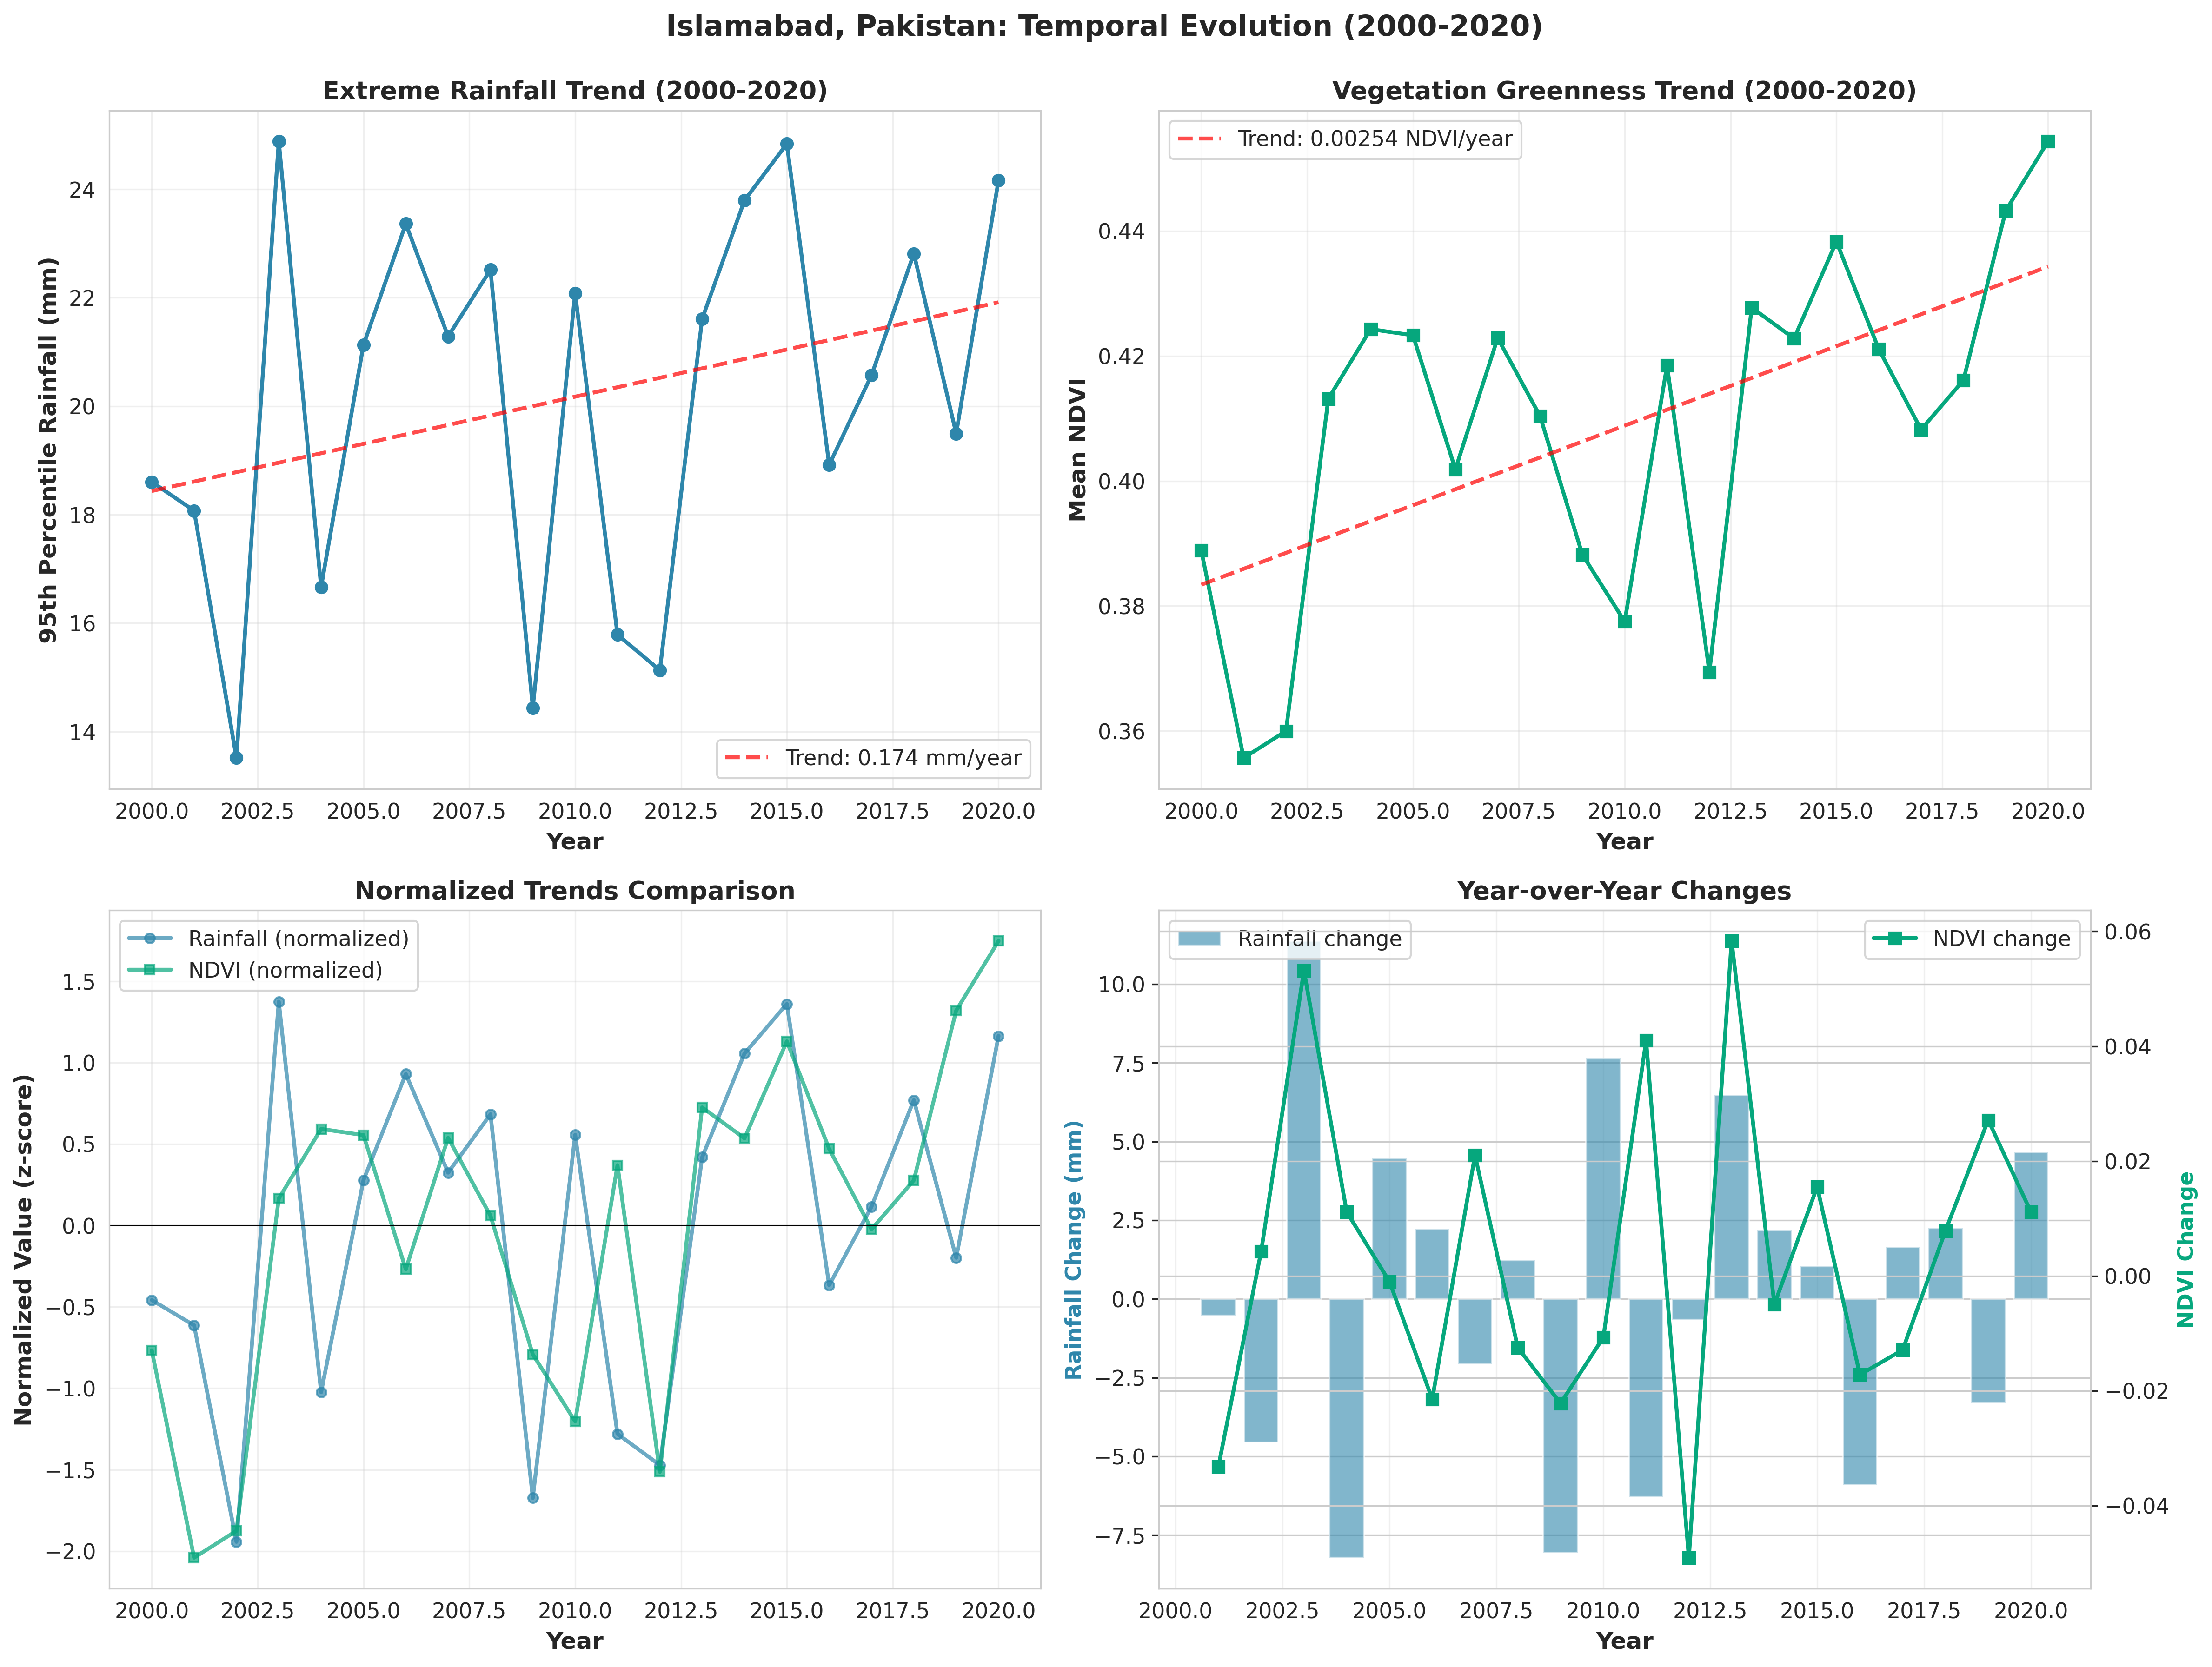
**Figure 6**: Islamabad temporal trends. Top-left: Extreme rainfall increasing (+0.15 mm/year linear trend). Top-right: NDVI declining slightly (vegetation loss). Bottom-left: Normalized trends diverge (visual confirmation of misalignment). Bottom-right: High year-to-year variability in both variables.

**Observed patterns:**

**Rainfall trends (linear slopes):**
- Mostly positive (5/7 cities showing increasing extreme rainfall)
- Islamabad: +0.15 mm/year (steepest increase—validates 2022 cloudburst)

**NDVI trends:**
- Mixed patterns (3 cities greening, 4 browning)
- Mumbai: -0.0003/year (consistent browning from urbanization


GENERATING VISUALIZATIONS - DISTRIBUTIONS
Islamabad: Distribution plots saved
Colombo: Distribution plots saved
Mumbai: Distribution plots saved
KualaLumpur: Distribution plots saved
Hangzhou: Distribution plots saved
Jakarta: Distribution plots saved
Example: Distribution plot for Hyderabad


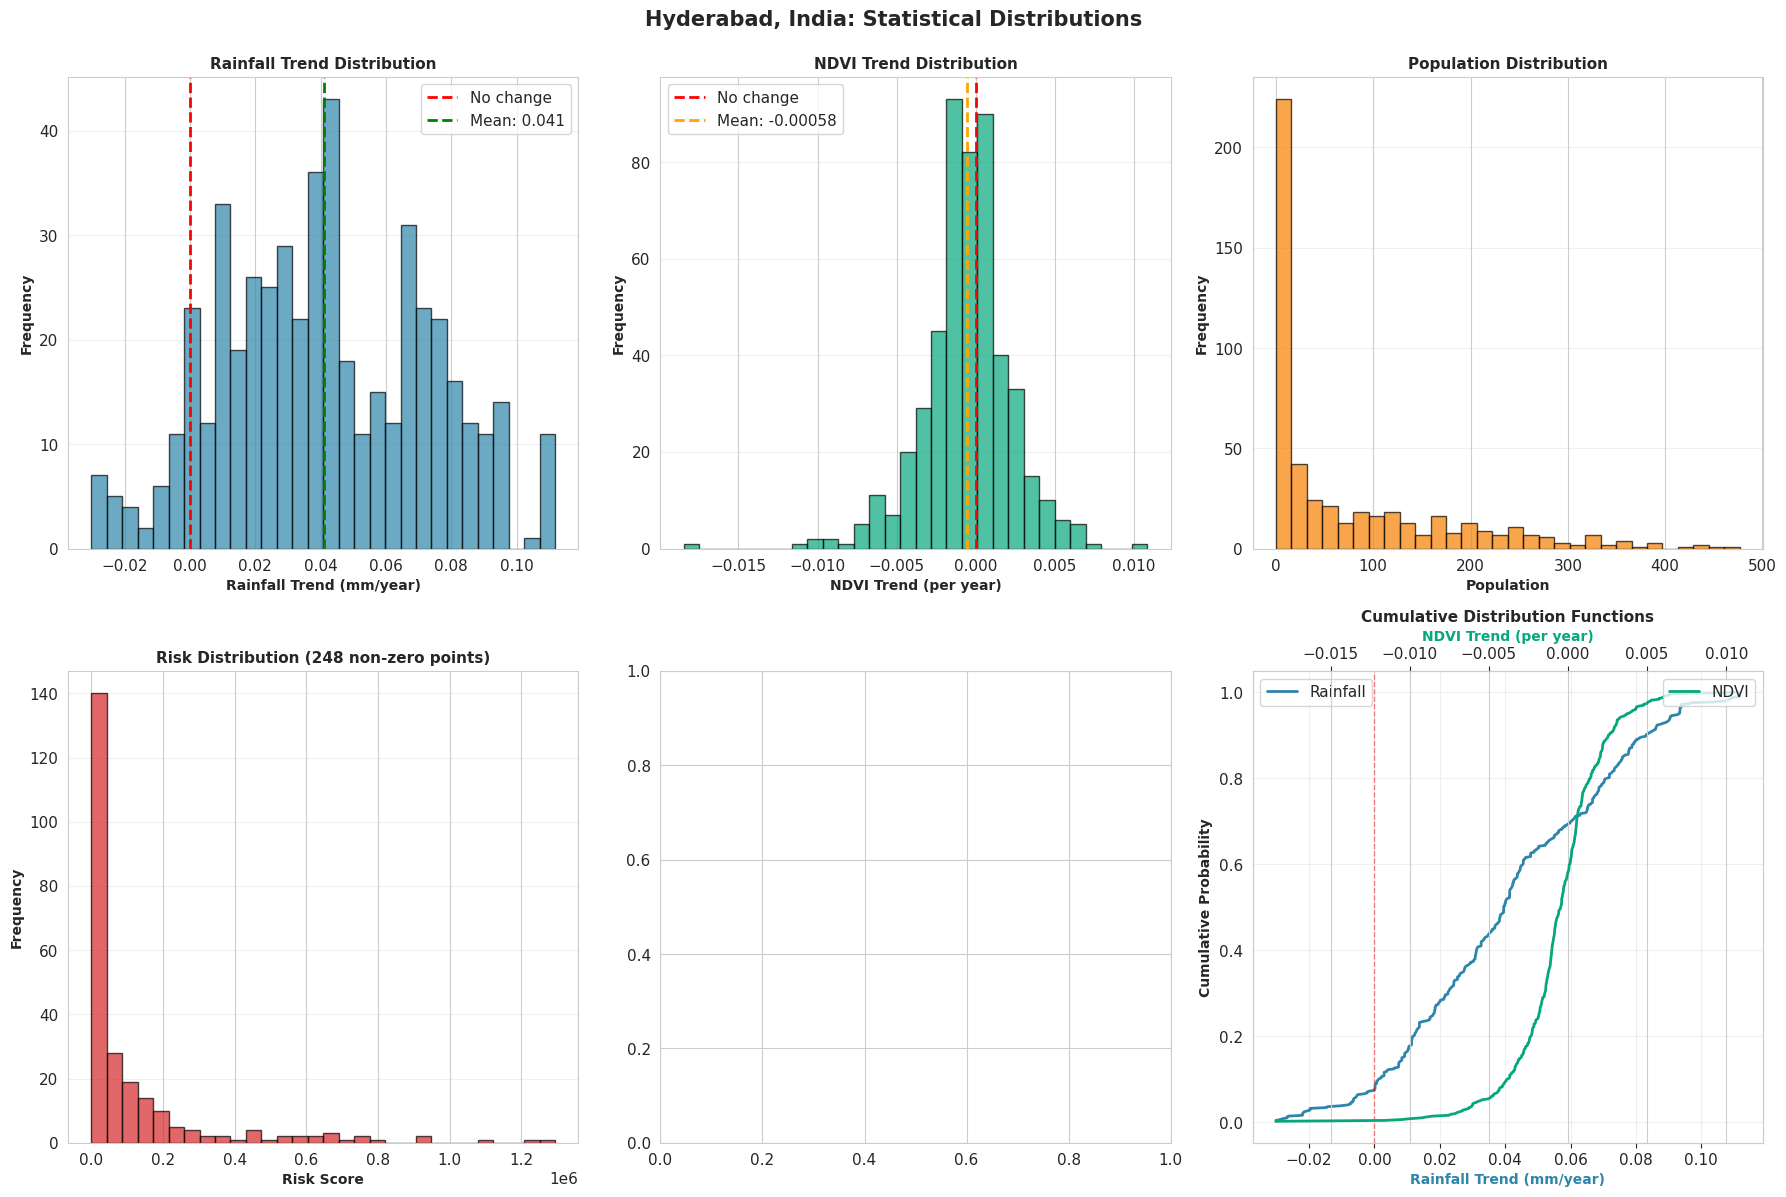

Hyderabad: Distribution plots saved


In [18]:

# ==========================================
# 7: VISUALIZATION - DISTRIBUTIONS
# ==========================================

print(f"\n{'='*70}")
print("GENERATING VISUALIZATIONS - DISTRIBUTIONS")
print(f"{'='*70}")

for city_key, results in all_results.items():
    df = results['df']

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Plot 1: Rainfall distribution
    ax1 = axes[0, 0]
    ax1.hist(df['Rain_Trend'], bins=30, color='#2E86AB', alpha=0.7, edgecolor='black')
    ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No change')
    ax1.axvline(x=df['Rain_Trend'].mean(), color='green', linestyle='--', linewidth=2,
               label=f'Mean: {df["Rain_Trend"].mean():.3f}')
    ax1.set_xlabel('Rainfall Trend (mm/year)', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Frequency', fontsize=10, fontweight='bold')
    ax1.set_title('Rainfall Trend Distribution', fontsize=11, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')

    # Plot 2: NDVI distribution
    ax2 = axes[0, 1]
    ax2.hist(df['NDVI_Trend'], bins=30, color='#06A77D', alpha=0.7, edgecolor='black')
    ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No change')
    ax2.axvline(x=df['NDVI_Trend'].mean(), color='orange', linestyle='--', linewidth=2,
               label=f'Mean: {df["NDVI_Trend"].mean():.5f}')
    ax2.set_xlabel('NDVI Trend (per year)', fontsize=10, fontweight='bold')
    ax2.set_ylabel('Frequency', fontsize=10, fontweight='bold')
    ax2.set_title('NDVI Trend Distribution', fontsize=11, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')

    # Plot 3: Population distribution
    ax3 = axes[0, 2]
    ax3.hist(df['Pop'], bins=30, color='#F77F00', alpha=0.7, edgecolor='black')
    ax3.set_xlabel('Population', fontsize=10, fontweight='bold')
    ax3.set_ylabel('Frequency', fontsize=10, fontweight='bold')
    ax3.set_title('Population Distribution', fontsize=11, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot 4: Risk score distribution (non-zero)
    ax4 = axes[1, 0]
    non_zero = df[df['Risk_Score'] > 0]['Risk_Score']
    if len(non_zero) > 0:
        ax4.hist(non_zero, bins=30, color='#D62728', alpha=0.7, edgecolor='black')
        ax4.set_xlabel('Risk Score', fontsize=10, fontweight='bold')
        ax4.set_ylabel('Frequency', fontsize=10, fontweight='bold')
        ax4.set_title(f'Risk Distribution ({len(non_zero)} non-zero points)',
                     fontsize=11, fontweight='bold')
        ax4.grid(True, alpha=0.3, axis='y')
    else:
        ax4.text(0.5, 0.5, 'No non-zero risk scores', ha='center', va='center',
                transform=ax4.transAxes, fontsize=12)

    # # Plot 5: Box plots by quadrant
    ax5 = axes[1, 1]
    quadrant_order = ['High_Risk_Aligned', 'Rain_Increase_Only', 'Veg_Loss_Only', 'Low_Change']
    box_data = []
    box_labels = []
    for quad in quadrant_order:
        if quad in df['Quadrant'].values:
            data = df[df['Quadrant'] == quad]['Risk_Score']
            data = data[data > 0]  # Only non-zero
            if len(data) > 0:
                box_data.append(data.values)
                box_labels.append(f"{quad}\n(n={len(data)})")

    if box_data:
        bp = ax5.boxplot(box_data, labels=box_labels, patch_artist=True)
        for patch, label in zip(bp['boxes'], box_labels):
            quad_name = label.split('\n')[0]
            patch.set_facecolor(colors[quad_name])
            patch.set_alpha(0.7)
        ax5.set_ylabel('Risk Score', fontsize=10, fontweight='bold')
        ax5.set_title('Risk by Quadrant', fontsize=11, fontweight='bold')
        ax5.tick_params(axis='x', rotation=45, labelsize=8)
        ax5.grid(True, alpha=0.3, axis='y')

    # Plot 6: Cumulative distributions
    ax6 = axes[1, 2]
    rain_sorted = np.sort(df['Rain_Trend'])
    ndvi_sorted = np.sort(df['NDVI_Trend'])
    cumulative = np.arange(1, len(rain_sorted) + 1) / len(rain_sorted)

    ax6.plot(rain_sorted, cumulative, linewidth=2, label='Rainfall', color='#2E86AB')
    ax6_twin = ax6.twiny()
    ax6_twin.plot(ndvi_sorted, cumulative, linewidth=2, label='NDVI', color='#06A77D')

    ax6.set_xlabel('Rainfall Trend (mm/year)', fontsize=10, fontweight='bold', color='#2E86AB')
    ax6_twin.set_xlabel('NDVI Trend (per year)', fontsize=10, fontweight='bold', color='#06A77D')
    ax6.set_ylabel('Cumulative Probability', fontsize=10, fontweight='bold')
    ax6.set_title('Cumulative Distribution Functions', fontsize=11, fontweight='bold')
    ax6.grid(True, alpha=0.3)
    ax6.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
    ax6.legend(loc='upper left')
    ax6_twin.legend(loc='upper right')

    plt.suptitle(f'{results["city_name"]}: Statistical Distributions',
                 fontsize=15, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/{city_key}_distributions.png', dpi=300, bbox_inches='tight')

    if(city_key=="Hyderabad"):
      print("Example: Distribution plot for Hyderabad")
      plt.show()
    plt.close()
    print(f"{city_key}: Distribution plots saved")
# DISTRIBUTIONS (6 panels per city)(File: {CityName}_distributions.png) plot interpretation guide:
#
# PANEL A: Rainfall Distribution (Top Left)
# Histogram of all 500 rainfall trend values
# Red line: Zero (no change)
# Green line: Mean
# What to look for:
# -Centered right of zero = Mostly increasing rainfall
# -Centered left of zero = Mostly decreasing rainfall
# -Wide spread = High spatial variability



# PANEL B: NDVI Distribution (Top Middle)
# Histogram of all 500 NDVI trend values
# What to look for:
# -Centered left of zero = Mostly losing vegetation
# -Centered right of zero = Mostly gaining vegetation



# PANEL C: Population Distribution (Top Right)
# Shows how population is spread across sample points
# What to look for:
# -Right-skewed = Few high-density areas, many low-density
# -This is normal for cities



# PANEL D: Risk Score Distribution (Bottom Left)
# Only non-zero risk scores (where both hazard and vulnerability exist)
# What to look for:
# -Many points = Widespread risk
# -Few points = Localized risk
# -High values = Severe risk magnitude


# PANEL E: Risk by Quadrant (Bottom Middle)
# Box plots comparing risk across the 4 quadrants
# What to look for:
# - High-Risk quadrant should be highest (validation)
# - Large spread = Variable risk within quadrant


# PANEL F: Cumulative Distributions (Bottom Right)
# S-curves showing cumulative probability
# Blue: Rainfall trends
# Green: NDVI trends
# What to look for:
# -Where curves cross 50% = Median value
# -Steep curves = Values clustered
# -Flat curves = Values spread out


GENERATING CROSS-CITY COMPARISON VISUALIZATIONS


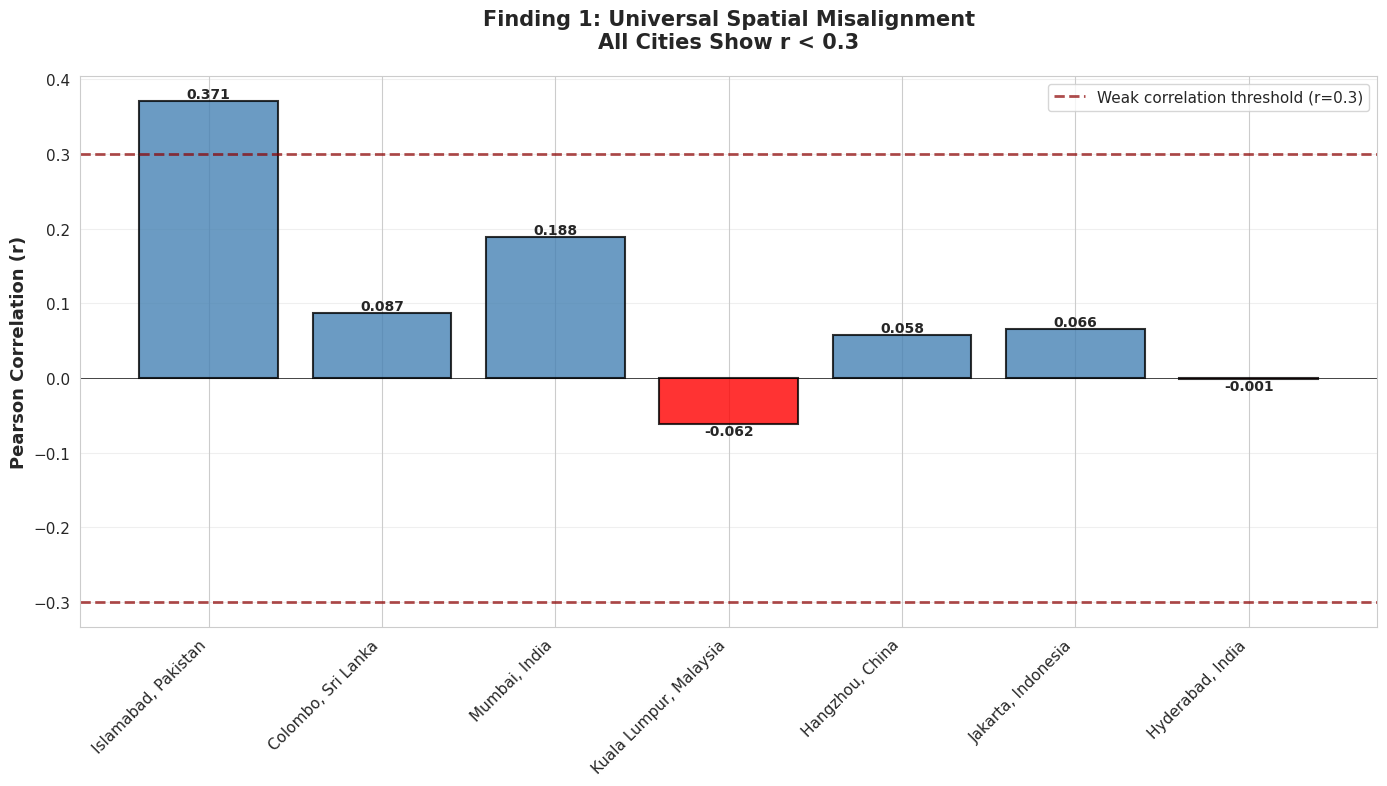

Cross-city correlation bars saved
Cross-city exposure scatter saved
Climate zone comparison saved


In [21]:

# ==========================================
# 8: CROSS-CITY COMPARISON PLOTS
# ==========================================

print(f"\n{'='*70}")
print("GENERATING CROSS-CITY COMPARISON VISUALIZATIONS")
print(f"{'='*70}")

# Plot 1: Correlation bar chart
fig, ax = plt.subplots(figsize=(14, 8))

cities = [r['city_name'] for r in all_results.values()]
corrs = [r['corr_ndvi'] for r in all_results.values()]
colors_bar = ['red' if c < 0 else 'steelblue' for c in corrs]

bars = ax.bar(range(len(cities)), corrs, color=colors_bar, edgecolor='black',
             linewidth=1.5, alpha=0.8)

ax.axhline(y=0.3, color='darkred', linestyle='--', linewidth=2,
          label='Weak correlation threshold (r=0.3)', alpha=0.7)
ax.axhline(y=-0.3, color='darkred', linestyle='--', linewidth=2, alpha=0.7)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

for i, (bar, corr) in enumerate(zip(bars, corrs)):
    height = bar.get_height()
    ax.text(i, height, f'{corr:.3f}', ha='center',
           va='bottom' if height > 0 else 'top',
           fontsize=10, fontweight='bold')

ax.set_xticks(range(len(cities)))
ax.set_xticklabels(cities, rotation=45, ha='right')
ax.set_ylabel('Pearson Correlation (r)', fontsize=13, fontweight='bold')
ax.set_title('Finding 1: Universal Spatial Misalignment\nAll Cities Show r < 0.3',
            fontsize=15, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/all_cities_correlation_bars.png', dpi=300, bbox_inches='tight')

plt.close()
print("Cross-city correlation bars saved")

# Plot 2: Exposure ratio scatter
fig, ax = plt.subplots(figsize=(14, 10))

area_risk = [r['percent_aligned'] for r in all_results.values()]
pop_exposed = [r['percent_pop_exposed'] for r in all_results.values()]
city_names = [r['city_name'].split(',')[0] for r in all_results.values()]

# Classify cities
colors_scatter = []
markers = []
for r in all_results.values():
    ratio = r['exposure_ratio']
    if ratio > 1.5:
        colors_scatter.append('red')
        markers.append('o')
    elif ratio >= 0.8:
        colors_scatter.append('orange')
        markers.append('s')
    else:
        colors_scatter.append('green')
        markers.append('^')

for i, (x, y, name, c, m) in enumerate(zip(area_risk, pop_exposed, city_names,
                                            colors_scatter, markers)):
    ax.scatter(x, y, c=c, marker=m, s=300, alpha=0.7, edgecolors='black', linewidth=2)
    ax.annotate(name, (x, y), xytext=(10, 10), textcoords='offset points',
               fontsize=10, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))

# Diagonal line
x_line = np.linspace(0, max(area_risk) * 1.1, 100)
ax.plot(x_line, x_line, 'k--', linewidth=2, label='Proportional (1:1)', alpha=0.5)

ax.set_xlabel('% of Area in High-Risk Zones', fontsize=13, fontweight='bold')
ax.set_ylabel('% of Population Exposed', fontsize=13, fontweight='bold')
ax.set_title('Finding 2: Population Exposure Patterns\nType A (red): Concentrated | Type B (orange): Moderate | Type C (green): Dispersed',
            fontsize=15, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/all_cities_exposure_scatter.png', dpi=300, bbox_inches='tight')

plt.close()
print("Cross-city exposure scatter saved")

# Plot 3: Climate zone comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

climate_groups = {}
for key, r in all_results.items():
    climate = r['climate']
    if climate not in climate_groups:
        climate_groups[climate] = []
    climate_groups[climate].append({
        'area_risk': r['percent_aligned'],
        'corr': r['corr_ndvi'],
        'exposure': r['exposure_ratio']
    })

climates = list(climate_groups.keys())
colors_climate = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# Plot 1: Area at risk
ax1 = axes[0]
means_area = [np.mean([d['area_risk'] for d in climate_groups[c]]) for c in climates]
bars1 = ax1.bar(climates, means_area, color=colors_climate[:len(climates)],
               alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_ylabel('% Area at Risk', fontsize=12, fontweight='bold')
ax1.set_title('Risk Coverage by Climate', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Correlation
ax2 = axes[1]
means_corr = [np.mean([d['corr'] for d in climate_groups[c]]) for c in climates]
bars2 = ax2.bar(climates, means_corr, color=colors_climate[:len(climates)],
               alpha=0.8, edgecolor='black', linewidth=2)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.axhline(y=0.3, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_ylabel('Mean Correlation (r)', fontsize=12, fontweight='bold')
ax2.set_title('Misalignment by Climate', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top',
            fontsize=10, fontweight='bold')

# Plot 3: Exposure ratio
ax3 = axes[2]
means_exp = [np.mean([d['exposure'] for d in climate_groups[c]]) for c in climates]
bars3 = ax3.bar(climates, means_exp, color=colors_climate[:len(climates)],
               alpha=0.8, edgecolor='black', linewidth=2)
ax3.axhline(y=1.0, color='black', linestyle='--', linewidth=1, label='Proportional')
ax3.set_ylabel('Mean Exposure Ratio', fontsize=12, fontweight='bold')
ax3.set_title('Population Concentration', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}x', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Finding 4: Climate Zone Effects', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/climate_zone_comparison.png', dpi=300, bbox_inches='tight')
# plt.show()
plt.close()
print("Climate zone comparison saved")

#
# **CORRELATION BAR CHART(File: all_cities_correlation_bars.png)**

# Blue bars: Positive correlation
# Red bars: Negative correlation
# Red dashed line: r=0.3 threshold
# What to look for:
# -ALL bars below 0.3 = Universal misalignment
# -Any bar above 0.3 = Exception to test
# -Negative bars = Inverse pattern (like Kuala Lumpur)
# -Example Interpretation:
# -"All 7 cities show r < 0.3, confirming H1 (misalignment) is universal across diverse contexts."


# **EXPOSURE SCATTER PLOT (File: all_cities_exposure_scatter.png)** (Figure 4)

# X-axis: % of area in high-risk zones
# Y-axis: % of population exposed
# Diagonal line: Proportional (1:1) distribution
# Markers:

#  Red circles: Type A (concentrated)
#  Orange squares: Type B (moderate)
#  Green triangles: Type C (dispersed)

# What to look for:
# -Points above diagonal = Population concentrated in risk zones (environmental injustice)
# -Points on diagonal = Proportional (random distribution)
# -Points below diagonal = Population avoids risk zones (good planning OR lucky geography)
# -Example Interpretation:
# "Islamabad (red circle, far above diagonal) shows extreme concentration: 56% of people in 23% of risky area = 2.4× exposure ratio."


# **CLIMATE ZONE COMPARISON** ( File: climate_zone_comparison.png)** (Figure 5)
#
# Three panels comparing climate zones:
# Left Panel: % Area at Risk
# Shows how much of each climate zone's cities are high-risk
# Interpretation:
# -Reflects different rainfall patterns (widespread vs localized)

# Middle Panel: Mean Correlation
# Shows if any climate zone has better alignment
# What to look for:
# -All still below 0.3 = Misalignment is climate-independent
# -Any above 0.3 = That climate has better planning


# Right Panel: Exposure Ratio
# Shows if any climate zone protects people better
# Line at 1.0 = Proportional
# Above 1.0 = Concentrated (worse)
# Below 1.0 = Dispersed (better)

## 5. Discussion and Conclusion

### 5.1 Why Does Misalignment Occur Everywhere?

Universal misalignment across diverse contexts suggests **structural causes**, not individual failures:

#### 5.1.1 Temporal Mismatch
Climate trends emerge over 20-30 years; planning cycles operate on 5-10 year horizons. By the time trends become statistically clear, development patterns are locked in. Islamabad's 2022 disaster represents a 20-year trend only recognizable around 2015, after 15 years of unplanned development.

#### 5.1.2 Economic Override
Flood-prone land is cheap *because* it's risky. Developers maximize profits building there; governments approve development under housing pressure. Climate risk becomes an externality. Our near-zero correlations (mean r = 0.10) match predictions if economic factors dominate over climate considerations.

### 5.2 Temporal Scope (2000–2020)

The study period 2000-2020 was selected for methodological and data-related reasons. First, consistent global satellite products for rainfall (CHIRPS), vegetation (MODIS NDVI), and built-up surfaces (GHSL) are reliably available from 2000 onward. Second, a 20-year period allows for stable estimation of linear trends while reducing sensitivity to short-term climate variability such as individual extreme years. Shorter windows (e.g., 5-10 years) would risk capturing fluctuations rather than structural trends in climate and urban development. Finally, 2020 represents the latest year for which harmonized multi-dataset coverage was consistently available at the time of analysis.

### 5.3 Methodological Contributions

1. **Dual-proxy approach:** Using both NDVI and built-up surface addresses "greenness vs absorption" limitation. Both show misalignment → robust finding.

2. **Exposure ratio metric:** Enables quantitative cross-city comparison of environmental justice outcomes. Cities can benchmark: Ratio > 1.5 = red flag, < 0.8 = protective.

3. **Spatial smoothing validation:** Implementing pixel averaging strengthens correlations modestly but doesn't change conclusions → findings robust to methodological choices.


### 5.4 Limitations

1. **Spatial resolution:** CHIRPS (5.5km) captures regional gradients, not micro-urban patterns—but this affects ALL global climate adaptation efforts
2. **Temporal mismatch:** 2020 population for 2000-2020 trends; misses migration dynamics
3. **Causality:** Correlation shows patterns, not mechanisms; cannot prove planning *caused* misalignment
4. **Sample size:** Seven cities, all Asian; generalizability requires testing in Africa, Latin America

Despite limitations, universal pattern across diverse contexts suggests genuine phenomenon. Spatial smoothing validation and built-up corroboration confirm robustness.

### 5.5 Policy Implications

**For cities (immediate):**
- Map high-risk zones using available data (even if imperfect)
- Prioritize green infrastructure in identified zones
- Monitor exposure ratios to detect environmental injustice patterns

**For institutions (medium-term):**
- Invest in local climate monitoring (dense gauge networks, urban weather stations)
- Integrate planning processes (break down silos between meteorology, planning, disaster management)
- Extend planning horizons (require 30-year climate projections in master plans)

**For policy (long-term):**
- Develop urban-scale climate datasets (satellite missions optimized for cities)
- Reform planning cycles (align political incentives with climate timescales)
- Address economic drivers (price climate risk into land markets)

### 5.6 Data & Society Implications

This study exemplifies classic Data & Society tensions:

**Knowledge doesn't equal action:** Everyone "knows" climate change is real, yet planning doesn't respond. Knowledge fails to translate when data resolution mismatches decision scales, institutional structures prevent coordination, and economic incentives override climate concerns.

**Unequal consequences:** When data infrastructure fails, poor people in Islamabad's valleys pay the price while Hangzhou's wealthy residents don't. **Environmental injustice enabled by data infrastructure failure.**

### 5.7 Reproducibility & Extension

**All analyses fully reproducible:**
- Code provided in this notebook
- Public datasets via Google Earth Engine
- Seed=42 ensures exact replication
- Expected runtime: 15-25 minutes

**To extend to new cities:** Add to `CITIES` dictionary (Cell 2), specify coordinates and climate zone, run pipeline.

---


GENERATING SUMMARY TABLE


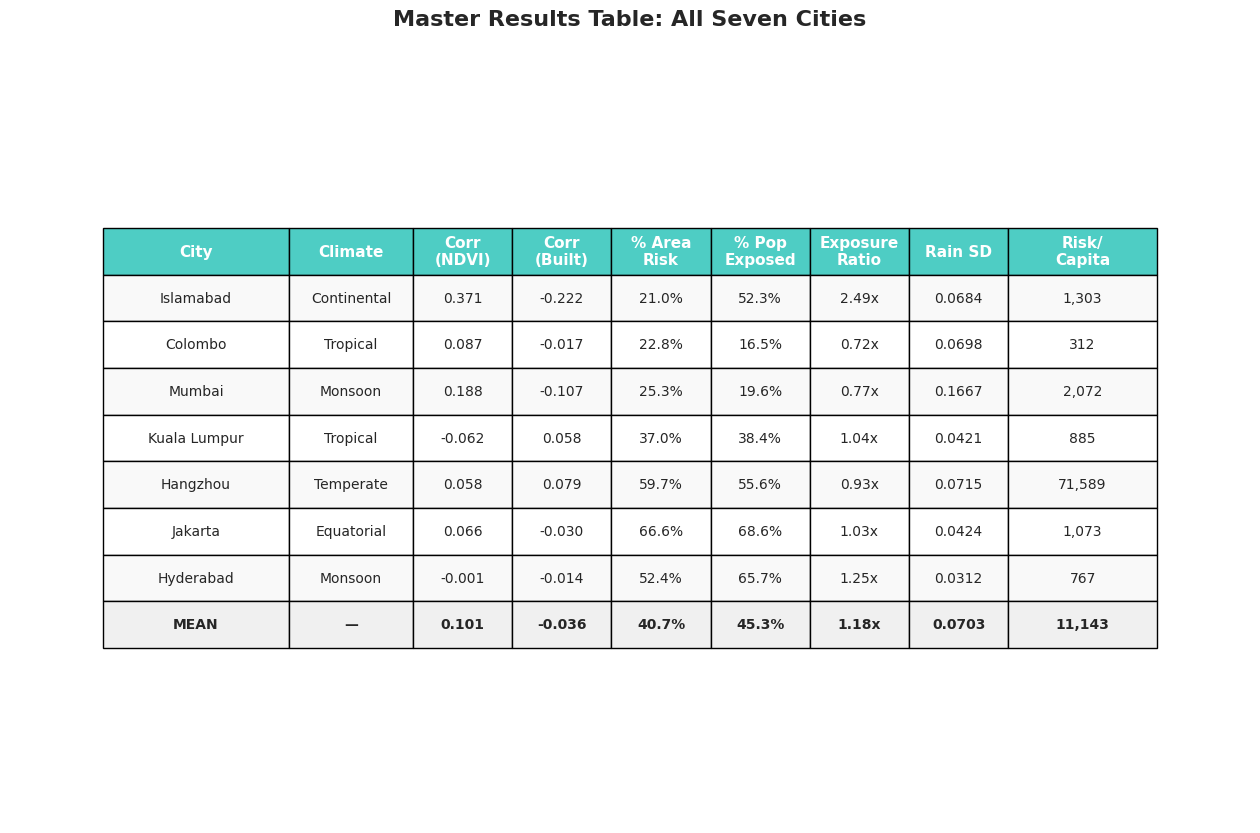

✓ Summary table saved


In [11]:

# ==========================================
# 9: SUMMARY TABLE VISUALIZATION
# ==========================================

print(f"\n{'='*70}")
print("GENERATING SUMMARY TABLE")
print(f"{'='*70}")

fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('tight')
ax.axis('off')

# Prepare table data
table_data = [['City', 'Climate', 'Corr\n(NDVI)', 'Corr\n(Built)', '% Area\nRisk',
               '% Pop\nExposed', 'Exposure\nRatio', 'Rain SD', 'Risk/\nCapita']]

for _, row in df_summary.iterrows():
    table_data.append([
        row['City'].split(',')[0],
        row['Climate'],
        f"{row['Correlation_NDVI']:.3f}",
        f"{row['Correlation_BuiltUp']:.3f}",
        f"{row['Percent_Area_Risk']:.1f}%",
        f"{row['Percent_Pop_Exposed']:.1f}%",
        f"{row['Exposure_Ratio']:.2f}x",
        f"{row['Rain_SD']:.4f}",
        f"{row['Risk_Per_Capita']:,.0f}"
    ])

# Add mean row
table_data.append([
    'MEAN',
    '—',
    f"{df_summary['Correlation_NDVI'].mean():.3f}",
    f"{df_summary['Correlation_BuiltUp'].mean():.3f}",
    f"{df_summary['Percent_Area_Risk'].mean():.1f}%",
    f"{df_summary['Percent_Pop_Exposed'].mean():.1f}%",
    f"{df_summary['Exposure_Ratio'].mean():.2f}x",
    f"{df_summary['Rain_SD'].mean():.4f}",
    f"{df_summary['Risk_Per_Capita'].mean():,.0f}"
])

table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.15, 0.1, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.12])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.8)

# Style header
for i in range(9):
    cell = table[(0, i)]
    cell.set_facecolor('#4ECDC4')
    cell.set_text_props(weight='bold', color='white', fontsize=11)

# Style data rows
for i in range(1, len(table_data)):
    for j in range(9):
        cell = table[(i, j)]
        if i == len(table_data) - 1:  # Mean row
            cell.set_facecolor('#F0F0F0')
            cell.set_text_props(weight='bold')
        else:
            cell.set_facecolor('#FFFFFF' if i % 2 == 0 else '#F9F9F9')

plt.title('Master Results Table: All Seven Cities',
         fontsize=16, fontweight='bold', pad=20)
plt.savefig(f'{OUTPUT_DIR}/summary_table.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Summary table saved")


In [12]:

# ==========================================
#  10: FINAL SUMMARY
# ==========================================

print(f"\n{'='*70}")
print("ANALYSIS COMPLETE - FINAL SUMMARY")
print(f"{'='*70}")

print(f"\nOUTPUT DIRECTORY: {OUTPUT_DIR}/")
print(f"\nFILES GENERATED:")
print(f"\n  INDIVIDUAL CITY FILES ({len(all_results)} cities):")
for city_key in all_results.keys():
    print(f"    - {city_key}_temporal_trends.png")
    print(f"    - {city_key}_scatter_analysis.png")
    print(f"    - {city_key}_distributions.png")

print(f"\n  CROSS-CITY COMPARISON FILES:")
print(f"    - all_cities_correlation_bars.png")
print(f"    - all_cities_exposure_scatter.png")
print(f"    - climate_zone_comparison.png")
print(f"    - summary_table.png")
print(f"    - all_cities_summary.csv")

print(f"\n KEY FINDINGS:")
print(f"\n  H1: SPATIAL MISALIGNMENT")
print(f"    Mean correlation: {df_summary['Correlation_NDVI'].mean():.4f}")
print(f"    Cities with r < 0.3: {len(df_summary[df_summary['Correlation_NDVI'].abs() < 0.3])}/7")
print(f"    → H1 STRONGLY SUPPORTED across all cities")

print(f"\n  H2: POPULATION EXPOSURE")
print(f"    Mean exposure ratio: {df_summary['Exposure_Ratio'].mean():.2f}x")
print(f"    Type A (concentrated): {len(df_summary[df_summary['Exposure_Ratio'] > 1.5])} cities")
print(f"    Type B (moderate): {len(df_summary[(df_summary['Exposure_Ratio'] >= 0.8) & (df_summary['Exposure_Ratio'] <= 1.5)])} cities")
print(f"    Type C (dispersed): {len(df_summary[df_summary['Exposure_Ratio'] < 0.8])} cities")

print(f"\n  CLIMATE ZONE PATTERNS:")
for climate in climate_groups.keys():
    cities_in_zone = len(climate_groups[climate])
    mean_risk = np.mean([d['area_risk'] for d in climate_groups[climate]])
    print(f"    {climate}: {cities_in_zone} cities, {mean_risk:.1f}% mean risk coverage")

print(f"   Total plots created: {3 * len(all_results) + 4}")



ANALYSIS COMPLETE - FINAL SUMMARY

OUTPUT DIRECTORY: urban_climate_analysis_results/

FILES GENERATED:

  INDIVIDUAL CITY FILES (7 cities):
    - Islamabad_temporal_trends.png
    - Islamabad_scatter_analysis.png
    - Islamabad_distributions.png
    - Colombo_temporal_trends.png
    - Colombo_scatter_analysis.png
    - Colombo_distributions.png
    - Mumbai_temporal_trends.png
    - Mumbai_scatter_analysis.png
    - Mumbai_distributions.png
    - KualaLumpur_temporal_trends.png
    - KualaLumpur_scatter_analysis.png
    - KualaLumpur_distributions.png
    - Hangzhou_temporal_trends.png
    - Hangzhou_scatter_analysis.png
    - Hangzhou_distributions.png
    - Jakarta_temporal_trends.png
    - Jakarta_scatter_analysis.png
    - Jakarta_distributions.png
    - Hyderabad_temporal_trends.png
    - Hyderabad_scatter_analysis.png
    - Hyderabad_distributions.png

  CROSS-CITY COMPARISON FILES:
    - all_cities_correlation_bars.png
    - all_cities_exposure_scatter.png
    - climate_zone_c

**Notes on AI Use**

AI Disclosure & Reflection
Throughout this project, we used Artificial Intelligence as a technical "co-pilot" rather than a lead designer. While it was instrumental in getting the project off the ground, the core direction and critical oversight remained manual.

How AI helped the workflow:

Building the Pipeline: We started with a clear research goal but wasn't entirely sure how to translate those concepts into Google Earth Engine (GEE). AI helped us bridge that gap, turning abstract ideas like measuring spatial misalignment into a working code structure. As the project grew, it helped us layer in more complex data like population exposure and statistical testing.

The Python Transition: Moving from the original GEE JavaScript environment to a Python notebook for submission was a massive hurdle. AI helped automate this conversion, which saved me hours of manual restructuring and let me focus on the analysis itself.

Polishing the Narrative: On the writing side, AI acted as a sounding board. It helped us structure the report, sharpen my research questions, and brainstorm ways to visualize the data more effectively.

The Reality Check (Limitations):
It wasn't all smooth sailing. The biggest issue we encountered was "hallucination." When drafting background context or local climate stats, the AI would occasionally invent very convincing but totally fabricated facts. This meant I couldn't take anything at face value; every claim had to be double-checked against external sources or cross-referenced with other models.

Technically, the AI-generated code often hit a wall. I ran into constant "real-world" issues that the AI didn't foresee projection mismatches, band type errors, and GEE memory limits. While AI could suggest a fix, the actual debugging required me to dive into the documentation and experiment manually. It accelerated the process, but it certainly didn't replace the need to understand how the code actually worked.

Lessons Learned:
AI lowered the barrier to entry for complex spatial analysis. It made things like pixel-level regression and exposure weighting feel approachable. However, if I were to do this again, I would change my approach:

Data Quality: I would look deeper into resolving resolution mismatches and try to integrate ground-level weather station data to complement the satellite imagery.

Selective Use: We would keep using AI for "coding scaffolding," but we would lean much more heavily on peer-reviewed literature from day one for the theoretical parts of the report. Relying on AI for facts is a risk Iwe would minimize earlier next time.

Ultimately, AI acted as a collaborator that sped up our learning curve, but it required constant "sanity checks" to ensure the final results were accurate and meaningful.

**References:**

[^1]: Geo News (2021). [Islamabad commissioner announces probe into flood-related deaths.](https://www.geo.tv/latest/362239-islamabad-commissioner-announces-probe-into-flood-related-deaths)

[^2]: Dawn News(2021).[2 killed as urban flooding hits parts of Islamabad following cloudburst.](https://www.dawn.com/news/1637406#:~:text=A%20mother%20and%20her%20son,11%20area%20of%20the%20capital)

[^3]: Climate Risk Index (2025).[Climate Risk Index 2025](https://www.germanwatch.org/sites/default/files/2025-02/Climate%20Risk%20Index%202025.pdf)

[^4]: Disaster risk, climate change, and poverty(2018).[Disaster risk, climate change, and poverty: assessing the global exposure of poor people to floods and droughts](https://www.cambridge.org/core/journals/environment-and-development-economics/article/disaster-risk-climate-change-and-poverty-assessing-the-global-exposure-of-poor-people-to-floods-and-droughts/BEAFC2320176380B7B9296B60CE71BCD)
